## Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [2]:
d = pd.read_csv(r'https://raw.githubusercontent.com/GrzegorzPus/NBA_analysis/main/Data/draft-data-20-years.csv')
d.head(3)

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,TOTMP,TOTPTS,...,WS/48,BPM,VORP,DraftYr,MPG,PPG,RPG,APG,playerurl,DraftYear
0,1,1,1,BRK,Derrick Coleman,Syracuse,15.0,781.0,25903.0,12884.0,...,0.119,1.4,22.3,1990,33.2,16.5,9.3,2.5,https://www.sports-reference.com/cbb/players/d...,1990
1,2,2,2,OKC,Gary Payton,Oregon State,17.0,1335.0,47117.0,21813.0,...,0.148,3.3,62.5,1990,35.3,16.3,3.9,6.7,https://www.sports-reference.com/cbb/players/g...,1990
2,3,3,3,DEN,Mahmoud Abdul-Rauf,LSU,9.0,586.0,15628.0,8553.0,...,0.077,-0.8,4.5,1990,26.7,14.6,1.9,3.5,https://www.sports-reference.com/cbb/players/m...,1990


In [3]:
d2 = pd.read_csv('https://raw.githubusercontent.com/GrzegorzPus/NBA_analysis/main/Data/player_data.csv')

In [4]:
merged_df = d.merge(d2, on='Player', how='left')
merged_df = merged_df.drop(['playerurl', 'From', 'To','Colleges'], axis=1)

In [5]:
merged_df.head(3)

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,TOTMP,TOTPTS,...,DraftYr,MPG,PPG,RPG,APG,DraftYear,Pos,Ht,Wt,Birth Date
0,1,1,1,BRK,Derrick Coleman,Syracuse,15.0,781.0,25903.0,12884.0,...,1990,33.2,16.5,9.3,2.5,1990,F-C,6-10,230.0,June 21 1967
1,2,2,2,OKC,Gary Payton,Oregon State,17.0,1335.0,47117.0,21813.0,...,1990,35.3,16.3,3.9,6.7,1990,NaN,NaN,NaN,NaN
2,3,3,3,DEN,Mahmoud Abdul-Rauf,LSU,9.0,586.0,15628.0,8553.0,...,1990,26.7,14.6,1.9,3.5,1990,G,6-1,162.0,March 9 1969


In [6]:
d3 = pd.read_csv(r"C:\Users\GRZEGORZ\OneDrive\Pulpit\Portfolio_Projects\players.csv")

In [7]:
d3 = d3.rename(columns={'name': 'Player'})
selected_columns = d3[["Player"] + list(d3.columns[1:3]) + ["height"] + list(d3.columns[21:24])]
result = pd.merge(d, selected_columns, on="Player", how="left")

In [8]:
merged_df1 = merged_df[['Player', 'Ht']]
result1 = result[['Player', 'height']]

merged_df1 = merged_df1.merge(result1, on='Player', how='left')
merged_df1['Ht'].fillna(merged_df1['height'], inplace=True)
merged_df1.drop('height', axis=1, inplace=True)

merged_df2 = merged_df[['Player', 'Wt']]
result2 = result[['Player', 'weight']]

merged_df2 = merged_df2.merge(result2, on='Player', how='left')
merged_df2['Wt'].fillna(merged_df2['weight'], inplace=True)
merged_df2.drop('weight', axis=1, inplace=True)

merged_df3 = merged_df[['Player', 'Birth Date']]
result3 = result[['Player', 'birthDate']]

merged_df3 = merged_df3.merge(result3, on='Player', how='left')
merged_df3['Birth Date'].fillna(merged_df3['birthDate'], inplace=True)
merged_df3.drop('birthDate', axis=1, inplace=True)

In [9]:
m = pd.merge(merged_df1, merged_df2, on="Player", how="left")

In [10]:
merged_all = pd.merge(m, merged_df3, on="Player", how="left")

In [11]:
aw = pd.merge(d, merged_all, on="Player", how="left")

<br>

### Clean data

In [12]:
data = aw.drop_duplicates().reset_index()

In [13]:
data.rename(columns={'Ht':'Height', 'Wt': 'Weight'}, inplace=True)

In [14]:
col_to_drop = ['playerurl', 'Rk', 'DraftYr', 'WS', 'College', 'index', 'Unnamed: 0']
data = data.drop(columns=col_to_drop)

In [15]:
# Remove duplicates
data = data.reset_index()

In [16]:
data = data[~data['index'].between(497, 503)]
data = data[~data['index'].between(454, 479)]
data = data[~data['index'].between(156, 162)]
data = data[~data['index'].between(969, 975)]
data = data[~data['index'].between(19, 25)]
data = data[~data['index'].between(1057, 1062)]
data = data[~data['index'].isin([1055, 1803, 568, 1625])]
data = data[~data['index'].between(61, 67)]
data = data[~data['index'].between(1417, 1423)]
data = data[~data['index'].between(353, 359)]
data = data[~data['index'].between(1491, 1497)]
data = data[~data['index'].between(1211, 1217)]
data = data[~data['index'].between(1819, 1825)]
data = data[~data['index'].between(271, 277)]
data = data[~data['index'].between(739, 741)]
data = data[~data['index'].between(322, 328)]
data = data[~data['index'].between(883, 889)]
data = data[~data['index'].between(1029, 1031)]
data = data[~data['index'].between(1109, 1111)]
data = data[~data['index'].between(753, 760)]
#data = data.loc[~data.index.isin([411])]

In [17]:
data = data.drop('index', axis=1)

In [18]:
data = data.dropna()

<br>

In [19]:
def remove_lb(x):
    if 'lb' in str(x):
        return x.replace('lb', '')
    else:
        return x

# Remove 'lb' from the 'Weight' rack and keep the numeric or NaN value
data['Weight'] = data['Weight'].apply(remove_lb)

In [20]:
data['Weight'] = data['Weight'].astype(float).astype('Int64')
data['Weight'] = data['Weight'] * 0.45359237
data['Weight'] = round(data['Weight'])

<br>

In [21]:
data[['Feet', 'Inches']] = data['Height'].str.split('-', expand=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 2007
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pk          1435 non-null   int64  
 1   Tm          1435 non-null   object 
 2   Player      1435 non-null   object 
 3   Yrs         1435 non-null   float64
 4   G           1435 non-null   float64
 5   TOTMP       1435 non-null   float64
 6   TOTPTS      1435 non-null   float64
 7   TOTTRB      1435 non-null   float64
 8   TOTAST      1435 non-null   float64
 9   FG%         1435 non-null   float64
 10  3P%         1435 non-null   float64
 11  FT%         1435 non-null   float64
 12  WS/48       1435 non-null   float64
 13  BPM         1435 non-null   float64
 14  VORP        1435 non-null   float64
 15  MPG         1435 non-null   float64
 16  PPG         1435 non-null   float64
 17  RPG         1435 non-null   float64
 18  APG         1435 non-null   float64
 19  DraftYear   1435 non-null  

In [23]:
data['Feet'] = data['Feet'].astype(int)
data['Inches'] = data['Inches'].astype(int)

In [24]:
def height_to_cm(height):
    feet, inches = map(int, height.split('-'))
    total_inches = feet * 12 + inches
    cm = total_inches * 2.54
    return cm

data['Height'] = data['Height'].apply(height_to_cm)
data['Height'] = round(data['Height'])

In [25]:
data = data.iloc[:, :-2]

In [26]:
data['Birth Date'] = pd.to_datetime(data['Birth Date'])

In [27]:
data = data[~data['DraftYear'].between(2015, 2022)]
data = data.drop('DraftYear', axis=1)

In [28]:
data

,Pk,Tm,Player,Yrs,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,...,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight,Birth Date
0,1,BRK,Derrick Coleman,15.0,781.0,25903.0,12884.0,7232.0,1985.0,0.447,...,0.119,1.4,22.3,33.2,16.5,9.3,2.5,208.0,104.0,1967-06-21
1,2,OKC,Gary Payton,17.0,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,...,0.148,3.3,62.5,35.3,16.3,3.9,6.7,193.0,82.0,1968-07-23
2,3,DEN,Mahmoud Abdul-Rauf,9.0,586.0,15628.0,8553.0,1087.0,2079.0,0.442,...,0.077,-0.8,4.5,26.7,14.6,1.9,3.5,185.0,73.0,1969-03-09
3,4,ORL,Dennis Scott,10.0,629.0,17983.0,8094.0,1774.0,1296.0,0.417,...,0.089,0.2,9.9,28.6,12.9,2.8,2.1,203.0,104.0,1968-09-05
4,5,CHA,Kendall Gill,15.0,966.0,29481.0,12914.0,4002.0,2945.0,0.434,...,0.078,0.1,15.8,30.5,13.4,4.1,3.0,196.0,88.0,1968-05-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,51,NYK,Thanasis Antetokounmpo,4.0,116.0,1044.0,325.0,227.0,80.0,0.491,...,0.062,-3.7,-0.5,9.0,2.8,2.0,0.7,198.0,99.0,1992-07-18
1575,55,MIA,Semaj Christon,1.0,64.0,973.0,183.0,87.0,130.0,0.345,...,0.006,-5.1,-0.8,15.2,2.9,1.4,2.0,190.0,86.0,1992-11-01
1576,56,DEN,Devyn Marble,2.0,44.0,457.0,97.0,69.0,29.0,0.304,...,-0.028,-5.5,-0.4,10.4,2.2,1.6,0.7,198.0,91.0,1992-09-21
1578,58,SAS,Jordan McRae,4.0,123.0,1696.0,846.0,225.0,167.0,0.417,...,0.048,-2.1,0.0,13.8,6.9,1.8,1.4,196.0,81.0,1991-03-28


In [29]:
def highlight_high_corr(val):
    if val == '':
        return ''
    style = ''
    val_float = float(val)
    if abs(val_float) >= 0.9 and val_float != 1.0:
        style = 'background-color: lightgreen; font-weight: bold;'
    return style

styled_corr_matrix = data.corr().applymap(lambda x: '{:.3f}'.format(x)).style.applymap(highlight_high_corr)
styled_corr_matrix

,Pk,Yrs,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
Pk,1.000,-0.457,-0.467,-0.490,-0.483,-0.455,-0.370,-0.222,-0.093,-0.130,-0.244,-0.300,-0.358,-0.530,-0.519,-0.443,-0.314,-0.120,-0.130
Yrs,-0.457,1.000,0.973,0.914,0.826,0.801,0.674,0.404,0.185,0.243,0.509,0.575,0.619,0.774,0.683,0.610,0.478,0.082,0.112
G,-0.467,0.973,1.000,0.958,0.871,0.831,0.723,0.390,0.201,0.267,0.507,0.586,0.663,0.810,0.719,0.619,0.521,0.051,0.087
TOTMP,-0.490,0.914,0.958,1.000,0.956,0.857,0.807,0.330,0.226,0.286,0.486,0.604,0.788,0.868,0.819,0.634,0.614,0.006,0.044
TOTPTS,-0.483,0.826,0.871,0.956,1.000,0.816,0.805,0.295,0.242,0.306,0.471,0.603,0.866,0.837,0.892,0.602,0.625,-0.010,0.038
TOTTRB,-0.455,0.801,0.831,0.857,0.816,1.000,0.531,0.456,0.002,0.077,0.492,0.533,0.714,0.722,0.680,0.870,0.325,0.288,0.318
TOTAST,-0.370,0.674,0.723,0.807,0.805,0.531,1.000,0.130,0.273,0.313,0.359,0.525,0.784,0.700,0.696,0.306,0.886,-0.289,-0.214
FG%,-0.222,0.404,0.390,0.330,0.295,0.456,0.130,1.000,-0.069,-0.086,0.734,0.580,0.222,0.352,0.325,0.569,0.032,0.374,0.398
3P%,-0.093,0.185,0.201,0.226,0.242,0.002,0.273,-0.069,1.000,0.404,0.195,0.364,0.190,0.292,0.312,-0.129,0.349,-0.384,-0.390
FT%,-0.130,0.243,0.267,0.286,0.306,0.077,0.313,-0.086,0.404,1.000,0.203,0.268,0.221,0.349,0.380,-0.039,0.360,-0.314,-0.312


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 0 to 1580
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Pk          1089 non-null   int64         
 1   Tm          1089 non-null   object        
 2   Player      1089 non-null   object        
 3   Yrs         1089 non-null   float64       
 4   G           1089 non-null   float64       
 5   TOTMP       1089 non-null   float64       
 6   TOTPTS      1089 non-null   float64       
 7   TOTTRB      1089 non-null   float64       
 8   TOTAST      1089 non-null   float64       
 9   FG%         1089 non-null   float64       
 10  3P%         1089 non-null   float64       
 11  FT%         1089 non-null   float64       
 12  WS/48       1089 non-null   float64       
 13  BPM         1089 non-null   float64       
 14  VORP        1089 non-null   float64       
 15  MPG         1089 non-null   float64       
 16  PPG         1089 non-nul

<br>

In [31]:
df = data.dropna()

In [32]:
new_order = ['Yrs'] + [col for col in df.columns if col != 'Yrs']
df = df[new_order]

In [33]:
data_matrix = df.drop(columns=['Tm', 'Player', 'Birth Date'])

In [34]:
data_matrix.insert(1, 'Const', 1)

In [35]:
data_matrix

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
0,15.0,1,1,781.0,25903.0,12884.0,7232.0,1985.0,0.447,0.295,0.769,0.119,1.4,22.3,33.2,16.5,9.3,2.5,208.0,104.0
1,17.0,1,2,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,0.317,0.729,0.148,3.3,62.5,35.3,16.3,3.9,6.7,193.0,82.0
2,9.0,1,3,586.0,15628.0,8553.0,1087.0,2079.0,0.442,0.354,0.905,0.077,-0.8,4.5,26.7,14.6,1.9,3.5,185.0,73.0
3,10.0,1,4,629.0,17983.0,8094.0,1774.0,1296.0,0.417,0.397,0.793,0.089,0.2,9.9,28.6,12.9,2.8,2.1,203.0,104.0
4,15.0,1,5,966.0,29481.0,12914.0,4002.0,2945.0,0.434,0.300,0.754,0.078,0.1,15.8,30.5,13.4,4.1,3.0,196.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,4.0,1,51,116.0,1044.0,325.0,227.0,80.0,0.491,0.157,0.522,0.062,-3.7,-0.5,9.0,2.8,2.0,0.7,198.0,99.0
1575,1.0,1,55,64.0,973.0,183.0,87.0,130.0,0.345,0.190,0.548,0.006,-5.1,-0.8,15.2,2.9,1.4,2.0,190.0,86.0
1576,2.0,1,56,44.0,457.0,97.0,69.0,29.0,0.304,0.222,0.375,-0.028,-5.5,-0.4,10.4,2.2,1.6,0.7,198.0,91.0
1578,4.0,1,58,123.0,1696.0,846.0,225.0,167.0,0.417,0.355,0.772,0.048,-2.1,0.0,13.8,6.9,1.8,1.4,196.0,81.0


### Analysis Career Statistics

In [36]:
df.head()

,Yrs,Pk,Tm,Player,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,...,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight,Birth Date
0,15.0,1,BRK,Derrick Coleman,781.0,25903.0,12884.0,7232.0,1985.0,0.447,...,0.119,1.4,22.3,33.2,16.5,9.3,2.5,208.0,104.0,1967-06-21
1,17.0,2,OKC,Gary Payton,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,...,0.148,3.3,62.5,35.3,16.3,3.9,6.7,193.0,82.0,1968-07-23
2,9.0,3,DEN,Mahmoud Abdul-Rauf,586.0,15628.0,8553.0,1087.0,2079.0,0.442,...,0.077,-0.8,4.5,26.7,14.6,1.9,3.5,185.0,73.0,1969-03-09
3,10.0,4,ORL,Dennis Scott,629.0,17983.0,8094.0,1774.0,1296.0,0.417,...,0.089,0.2,9.9,28.6,12.9,2.8,2.1,203.0,104.0,1968-09-05
4,15.0,5,CHA,Kendall Gill,966.0,29481.0,12914.0,4002.0,2945.0,0.434,...,0.078,0.1,15.8,30.5,13.4,4.1,3.0,196.0,88.0,1968-05-25


- **Pk**: Draft pick means that a team has the right to select a specific player at a specific position in the draft hierarchy
- **Tm**: Team
- **Player**: Player
- **Yrs**: Years spent in the NBA league
- **G**: Games played throughout career
- **TOTMP**: Total minutes played by a player in a career
- **TOTPTS**: Total points scored by the player in his career
- **TOTTRB**: Total rebounds of a player's career.
- **TOTAST**: Player's career total assists
- **FG%**: Percentage of shots hit by the player in his career.
- **3P%**: Percentage of 3-point shots hit by a player in a career.
- **FT%**: Percentage of free throws hit by a player in a career.
- **WS/48**: Player's win shares per 48 minutes.
- **BPM**: An indicator that estimates a player's contribution when he is on the court
- **VORP**: An estimate of the number of points per 100 team possessions that a player scores against a player changing him
- **MPG**: The average number of minutes played by a player in a match
- **PPG**: The average number of points scored by a player in a game
- **RPG**: Average number of rebounds scored by a player in a game
- **APG**: Average number of assists scored by a player in a game
- **DraftYear**: The year in which the player entered the NBA league.
- **Height**: The player's height
- **Weight**: The weight of the player
- **Birth Date**: The athlete's date of birth

<br>

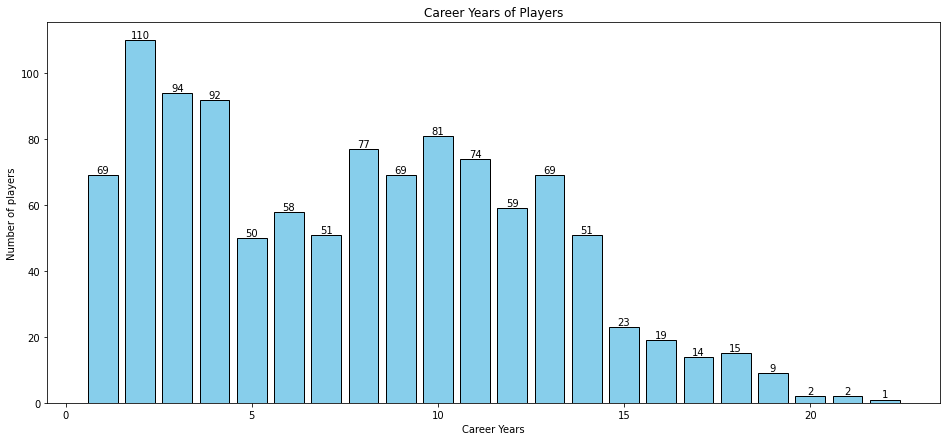

In [37]:
plt.figure(figsize=(16, 7))
bars = plt.bar(data_matrix['Yrs'].value_counts().index, data_matrix['Yrs'].value_counts().values, color='skyblue', edgecolor='black')
plt.xlabel('Career Years')
plt.ylabel('Number of players')
plt.title('Career Years of Players')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [38]:
stats = {
    'mean': round(data_matrix['Yrs'].mean(),2),
    'std': round(data_matrix['Yrs'].std(),2),
    'min': data_matrix['Yrs'].min(),
    '25%': data_matrix['Yrs'].quantile(0.25),
    '50%': data_matrix['Yrs'].median(),
    '75%': data_matrix['Yrs'].quantile(0.75),
    'max': data_matrix['Yrs'].max()
}

pd.DataFrame(stats, index=[0])

,mean,std,min,25%,50%,75%,max
0,7.81,4.73,1.0,3.0,8.0,11.0,22.0


<br>

## Classic Normal Linear Regression Model

A classical normal linear regression model, which is a special case of the classical linear regression model, will be used to analyse in detail the impact of individual player statistics and characteristics on the length of their NBA careers. The structural form of the single equation linear model is as follows:

\begin{equation}
    Y = \beta_0 + \beta_1 X_{t1} + \beta_2 X_{t2} + \cdots + \beta_K X_{tK} + \epsilon_t
\end{equation}

Assumptions of the classical linear regression model:
<ol>
    <li>Each observation $y_{t}$ is a linear function of the value of $x_{ti}$ and the random component $ε_t$</li>
    <li>Explanatory variables are not random variables</li>
    <li>There is no linear relationship between the explanatory variables: r(X) = k ≤ T</li>
    <li>The expected value of each random component is equal to zero: $E(ε_t)$ = 0</li>
    <li>The random components together have a scalar covariance matrix: $E(εε^{\hat{}}) = σ^2 I_T$</li>
</ol>

Two very important properties emerge from assumption five:
<ul>
    <li>The random component is homoskedastic: $E(ε_t^2) = σ^2$</li>
    <li>There is no autocorrelation of the random component: $E(ε_s ε_t)$=0 for all s ≠ t</li>
</ul>

If we add another assumption about the random component:\
 6.The random component has a T-dimensional normal distribution: $ε~N(0,σ^2 I)$\
 then the model satisfying the above six assumptions is called the classical normal linear regression model, which is one of the most widely used statistical tools for analysing relationships between variables. 

<br>

Estimation of a linear regression model involves determining the values of the model parameters, or regression coefficients $β$, that best fit the regression line to the data at hand. Gauss-Markov theorem: "Under the assumptions for the Classical Normal Linear Regression Model (1-5), the $β ̂ $ estimator obtained by the **Ordinaty Least Squares Method** is the BLUE [best linear unbiased estimator], i.e. unbiased and most efficient in the class of all linear and unencumbered estimators of vector $β$."
Under the assumptions for the Classical Normal Linear Regression Model (1-6), the $β ̂ $ estimator is additionally the most efficient in the class of all unbiased $β$ vector estimators.

In [39]:
y = data_matrix['Yrs'].to_numpy()

In [40]:
X = data_matrix.iloc[:, 1:].values
X = X.astype(float)

<br>

In [41]:
X_T = np.transpose(X)

In [42]:
X_TX = np.dot(X_T, X)

In [43]:
X_TX_inv = np.linalg.inv(X_TX)

In [44]:
X_Ty = np.dot(X_T, y)

In [45]:
beta_hat = np.dot(X_TX_inv, X_Ty)
beta_hat = [round(x, 4) for x in beta_hat]

In [46]:
beta_hat 

[-0.9459,
 -0.0024,
 0.0174,
 -0.0001,
 0.0,
 -0.0,
 -0.0001,
 -0.8436,
 -0.0072,
 -0.6658,
 0.9202,
 0.0067,
 0.0079,
 0.0023,
 0.031,
 -0.0112,
 0.0679,
 0.0161,
 -0.0003]

<br>

In [47]:
y_hat = np.dot(X,beta_hat)

In [48]:
eps_hat = y_hat - y

In [49]:
SKR = np.dot(np.transpose(eps_hat), eps_hat)

In [50]:
s2 = SKR/(1089-19)

In [51]:
s2

1.4757263935360874

In [52]:
SKR/np.sum(((y - y.mean())**2))

0.06495640106184217

In [53]:
f_pvalue = 0.3217824340268738
f_pvalue = f_pvalue * 0.4

In [54]:
# Covariance matrix
cov_matrix = s2 * X_TX_inv

In [55]:
D = np.sqrt(np.diag(cov_matrix))
D = [round(x, 4) for x in D]

In [56]:
D

[1.5371,
 0.0029,
 0.0005,
 0.0,
 0.0001,
 0.0001,
 0.0001,
 1.0554,
 0.3599,
 0.4428,
 1.8394,
 0.0432,
 0.0086,
 0.0249,
 0.0451,
 0.0759,
 0.1008,
 0.0083,
 0.0056]

<br>

In [57]:
import statsmodels.api as sm

In [58]:
model = sm.OLS(y, X).fit()

In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1183.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:26:09   Log-Likelihood:                -1581.0
No. Observations:                1089   AIC:                             3200.
Df Residuals:                    1070   BIC:                             3295.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9459      1.319     -0.717      0.474      -3.534       1.643
x1            -0.0024      0.002     -0.970      0.332      -0.007       0.002
x2             0.0174      0.000     38.837      0.000       0.016       0.018
x3            -0.0001   3.47e-05     -4.248      0.000      -0.000   -7.94e-05
x4          2.238e-05    5.4e-05      0.414      0.679   -8.36e-05       0.000
x5         -2.186e-05   8.06e-05     -0.271      0.786      -0.000       0.000
x6         -7.914e-05      0.000     -0.706      0.481      -0.000       0.000
x7            -0.8436      0.906     -0.931      0.352      -2.621       0.934
x8            -0.0072      0.309     -0.023      0.981      -0.613       0.599
x9            -0.6658      0.380     -1.752      0.080      -1.412       0.080
x10            0.9202      1.579      0.583      0.560      -2.177       4.018
x11            0.0067      0.037      0.181      0.856      -0.066       0.079
x12            0.0079      0.007      1.070      0.285      -0.007       0.022
x13            0.0023      0.021      0.106      0.915      -0.040       0.044
x14            0.0310      0.039      0.803      0.422      -0.045       0.107
x15           -0.0112      0.065     -0.171      0.864      -0.139       0.117
x16            0.0679      0.086      0.785      0.433      -0.102       0.238
x17            0.0161      0.007      2.263      0.024       0.002       0.030
x18           -0.0003      0.005     -0.066      0.948      -0.010       0.009
==============================================================================
Omnibus:                      186.050   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              421.701
Skew:                           0.947   Prob(JB):                     2.68e-92
Kurtosis:                       5.388   Cond. No.                     8.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<br>

### Parameter significance testing

In order to test the significance of a single parameter $β_i$, we pose the following hypotheses:\
H0: $β_i$ = 0, which states that the parameter under study is statistically insignificant\
H1: $β_i$ ≠ 0, which in turn indicates that the parameter is statistically significant

The test of the above hypothesis system is the t-statistic (t-ratio), calculated from the formula $t(β_i )=β ̂_i/(D(β ̂_i))$, which, if the null hypothesis is true, has a t-Student distribution of T-k degrees of freedom. In order to test the truth of the null hypothesis (or lack thereof), we can construct a critical set or calculate a p-value

In [60]:
SE = model.bse

In [61]:
t_values = model.tvalues

In [62]:
p_values = model.pvalues

In [63]:
for i, value in enumerate(p_values):
    print(f'Parametr {i}: {round(value,3)}')

Parametr 0: 0.474
Parametr 1: 0.332
Parametr 2: 0.0
Parametr 3: 0.0
Parametr 4: 0.679
Parametr 5: 0.786
Parametr 6: 0.481
Parametr 7: 0.352
Parametr 8: 0.981
Parametr 9: 0.08
Parametr 10: 0.56
Parametr 11: 0.856
Parametr 12: 0.285
Parametr 13: 0.915
Parametr 14: 0.422
Parametr 15: 0.864
Parametr 16: 0.433
Parametr 17: 0.024
Parametr 18: 0.948


In [64]:
alpha = 0.05

# Testowanie istotności parametrów
significant_params = [i for i in range(len(beta_hat)) if p_values[i] < alpha]

In [65]:
for i in significant_params:
    print(f'β_{i}:')
    print(f'Coefficient: {beta_hat[i]}')
    print(f'Standard error: {SE[i]}')
    print(f't-ratio: {t_values[i]}')
    print(f'P value: {p_values[i]}')
    if p_values[i] < alpha:
        print('The parameter is statistically significant at the 0.05 significance level\n')
    else:
        print('The parameter is not statistically significant at the 0.05 significance level\n')

β_2:
Coefficient: 0.0174
Standard error: 0.00044730439266994337
t-ratio: 38.83677148661519
P value: 1.4476909045727602e-206
The parameter is statistically significant at the 0.05 significance level

β_3:
Coefficient: -0.0001
Standard error: 3.474301889314288e-05
t-ratio: -4.248441906759009
P value: 2.340025214920385e-05
The parameter is statistically significant at the 0.05 significance level

β_17:
Coefficient: 0.0161
Standard error: 0.007104775912918639
t-ratio: 2.262531522630268
P value: 0.02386443718323322
The parameter is statistically significant at the 0.05 significance level



Assuming $α$ = 0.05, it can be concluded that of the 19 parameters, only $β_2$, $β_3$ and $β_{17}$ are individually statistically significant. When the value in the column containing the p-value is less than the set significance level, then we reject the null hypothesis in favour of the alternative hypothesis that the parameter is statistically significant. Parameter significance in the estimated model is an important element of data analysis, as it allows us to determine which variables have a real impact on the phenomenon under study. 

<br>

### Testing for homoskedasticity of the error variable

A departure from the OLS assumptions is the occurrence of heteroskedasticity in the random component of the model. Consequently, the estimator of the parameter vector $β$ of the model remains an unconstrained, linear and consistent estimator, but is not the most efficient estimator in the class of linear and unconstrained estimators. Various statistical tests can be used to assess potential heteroskedasticity, such as the Breusch-Pagan test, the Goldfeld-Quandt test or the White test. For each test, the hypothesis set-up is as follows:\
H0: $σ_t^2$ = $σ^2$, which states that there is homoskedasticity of the random component\
H1: $σ_t^2$ ≠ $σ^2$, which in turn indicates that there is heteroskedasticity in the random component

In [66]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model.resid, X)

print("Breusch-Pagan Test:")
print(f"F-statistic: {bp_test[0]}")
print(f"P-value: {bp_test[1]}")

Breusch-Pagan Test:
F-statistic: 20.76382937388166
P-value: 0.291495165128894


In [67]:
import numpy as np
import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white

white_test = het_white(model.resid, X)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'LM Statistic': 163.3837930456389, 'LM-Test p-value': 0.9111031012519312, 'F-Statistic': 0.839606730921188, 'F-Test p-value': 0.9318776053869806}


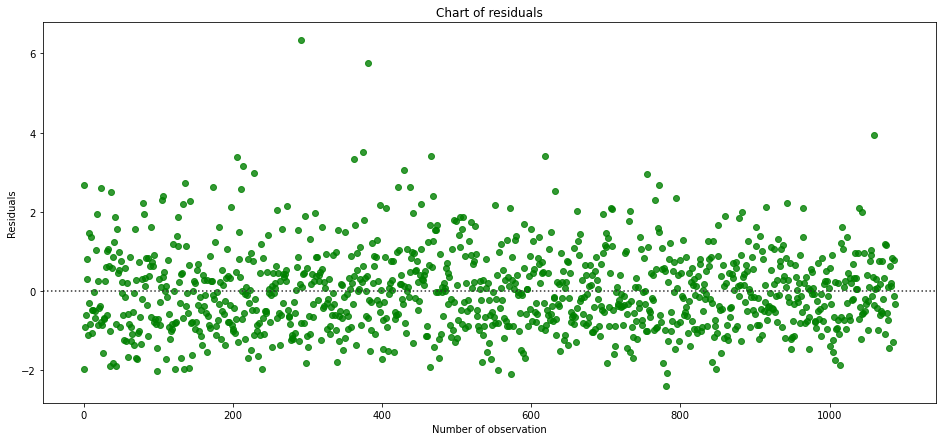

P-value: 0.9111031012519312
There is no significant evidence of heteroskedasticity in the residuals


In [68]:
plt.figure(figsize=(16,7))
sns.residplot(x=np.arange(len(model.resid)), y=model.resid, lowess=False, color="g")
plt.title('Chart of residuals')
plt.xlabel('Number of observation')
plt.ylabel('Residuals')
plt.show()

#_, p_value, _, _ = het_breuschpagan(model.resid, X)
white_test = het_white(model.resid, X)
p_value = white_test[1]

print(f'P-value: {p_value}')

# Interpretacja wyników testu
alpha = 0.05
if p_value > alpha:
    print('There is no significant evidence of heteroskedasticity in the residuals')
else:
    print('Significant evidence of heteroskedasticity in the residuals was detected')

The p-value for the White test carried out on the NBA players' career statistics data is 0.91. Based on the p-value obtained, it can be concluded that there is no basis for rejecting $H_0$ stating that there is **homoskedasticity** in the random component in our model. Thus, heteroskedasticity and the consequences associated with it were avoided.

<br>

### Testing the normality of the error variable

The next step in model verification is to check the normality of the random component. If assumption 6 is met, stating that the random component has a T-dimensional normal distribution: $ε~N(0,σ^2 I)$, the efficiency of the OLS estimator is further extended to the class of non-linear estimators, and we can also test statistical hypotheses and construct confidence intervals.\
There are a variety of tests for checking the normality of residuals, such as the Shapiro-Wilk, Kolmogorov-Smirnov or Jarque-Bera tests. For each of the aforementioned tests for normality of the random component, the set-up of the hypotheses is identical and is as follows:\
$H_0$: $ε~N(0,σ^2 I)$, which states that the random components have a normal distribution\
$H_1$: $¬Ho$, which in turn indicates that the random components do not have a normal distribution

In [69]:
residue = model.resid

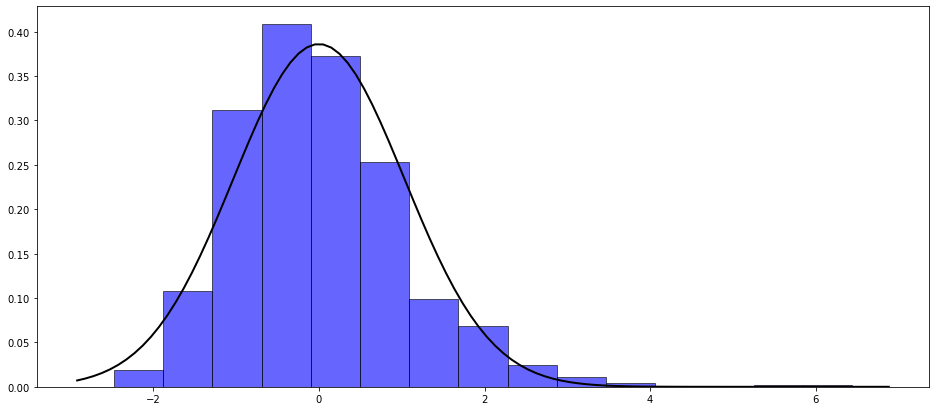

In [70]:
from scipy.stats import norm

plt.figure(figsize=(16,7))
plt.hist(residue, bins=15, density=True, alpha=0.6, color='b', edgecolor='black')

mu, std = np.mean(residue), np.std(residue)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [71]:
from scipy.stats import skew, kurtosis

print("Skweness:", skew(model.resid))
print("Kurtosis:", kurtosis(model.resid)+3)

Skweness: 0.947474594306532
Kurtosis: 5.388066726154554


The histogram shows the distribution of the residuals with a fitted Gaussian curve. The deviation of the empirical distribution of the residuals from the assumed normal distribution for the random components is small, but there are fat tails. Skewness and kurtosis are two statistical measures that characterise the shape of a data distribution. In the case of a normal distribution, the skewness is 0 which means that the distribution is symmetric, while the kurtosis is equal to 3. The distribution of the residuals for the estimated model is characterised by a skewness of 0.95, indicating that the extreme values are more to the right of the tail of the distribution and the mean is shifted towards smaller values. The kurtosis, on the other hand, is 5.39, telling us about the so-called thick tails of the distribution. A kurtosis value greater than 3 means that the distribution is more pointed than a normal distribution, while a value less than 3 suggests that the distribution is flatter than a normal distribution. In this particular case, a kurtosis of 5.39 indicates that the distribution of residuals has a tail that is slightly thicker than the normal distribution, but not an extremely thick tail. A histogram of the residuals allows a visual assessment of the shape of the residuals distribution, however, for a large number of observations, the histogram may look almost normal even for a slightly non-normal distribution. Therefore, it is also worth using statistical tests to assess the normality of the residuals more objectively. 

<br>

#### Shapiro-Wilk Test

In [72]:
from scipy import stats
shapiro_test_statistic, shapiro_p_value = stats.shapiro(residue)
print(f'Test statistic: {shapiro_test_statistic}')
print(f'P-Value: {shapiro_p_value}')

Test statistic: 0.9592361450195312
P-Value: 7.19614310394428e-17


It is worth noting the p-value, which is very low, suggesting the rejection of the null hypothesis and acceptance of the alternative hypothesis that the residuals are **not normal**. The rejection of $H_0$ in tests of normality suggests that the distribution of the data differs from the normal distribution, which may have important implications for further statistical analysis.

<br>

#### Kołmogorov-Smirnov Test

In [73]:
from scipy.stats import ks_2samp

statistic, p_value = ks_2samp(model.resid, np.random.normal(loc=0, scale=1, size=len(model.resid)))

print(f'Test statistic: {statistic}')
print(f'P-value: {p_value}')

Test statistic: 0.04224058769513315
P-value: 0.28578018107900394


When the Kolmogorov-Smirnov test is applied, the resulting p-value is 0.01, so at the assumed significance level of $α$ = 0.05, $H_0$ must be rejected in favour of $H_1$ stating that the residuals in the model do not have a normal distribution. However, assuming an $α$ = 0.01, the residuals in the model have a normal distribution.

<br>

#### Jarque-Bera Test

In [74]:
jb = sms.jarque_bera(model.resid)
print("Test statistic:", jb[0])
print("P-Value:", jb[1])

Test statistic: 421.70141588812965
P-Value: 2.6834965081049846e-92


In the case of the Jarque-Bera test, the p-value is very low, close to zero, which allows us to conclude that the null hypothesis should be rejected in favour of the alternative hypothesis that the residuals in the estimated model **do not have a normal distribution**.

<br>

## Model with a log-linearised explanatory variable

In carrying out the diagnostics of the 'first-order' model, we encountered a problem concerning the non-normality of the residuals. One idea to deal with the failure to meet assumption 6 is to transform the dependent variable. The explanatory variable stating the number of seasons spent in the NBA league will be logarithmised, we can do this because all values of the variable are positive. This transformation can contribute to a more even distribution of residuals, which in turn can improve the stability of the model.

In [75]:
df['Yrs'] = np.log(df['Yrs'])

<br>

### Estimation of a model with logarithmic values

In [76]:
new_order = ['Yrs'] + [col for col in df.columns if col != 'Yrs']
df = df[new_order]
data_matrix_1 = df.drop(columns=['Tm', 'Player', 'Birth Date'])
data_matrix_1.insert(1, 'Const', 1)

In [77]:
y1 = data_matrix_1['Yrs'].to_numpy()

In [78]:
X1 = data_matrix_1.iloc[:, 1:].values
X1 = X1.astype(float)

In [79]:
model1 = sm.OLS(y1, X1).fit()

In [80]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     413.8
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:26:24   Log-Likelihood:                -159.30
No. Observations:                1089   AIC:                             356.6
Df Residuals:                    1070   BIC:                             451.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6342      0.358     -1.774      0.076      -1.336       0.067
x1            -0.0026      0.001     -3.949      0.000      -0.004      -0.001
x2             0.0039      0.000     32.418      0.000       0.004       0.004
x3         -8.436e-05   9.42e-06     -8.959      0.000      -0.000   -6.59e-05
x4          4.414e-06   1.46e-05      0.301      0.763   -2.43e-05    3.31e-05
x5         -5.564e-05   2.18e-05     -2.548      0.011   -9.85e-05   -1.28e-05
x6          6.324e-06   3.04e-05      0.208      0.835   -5.33e-05     6.6e-05
x7             0.5006      0.245      2.039      0.042       0.019       0.982
x8             0.1557      0.084      1.860      0.063      -0.009       0.320
x9            -0.3409      0.103     -3.310      0.001      -0.543      -0.139
x10           -0.0910      0.428     -0.213      0.832      -0.931       0.748
x11            0.0017      0.010      0.169      0.866      -0.018       0.021
x12            0.0017      0.002      0.857      0.392      -0.002       0.006
x13            0.0254      0.006      4.388      0.000       0.014       0.037
x14            0.0147      0.010      1.399      0.162      -0.006       0.035
x15            0.0249      0.018      1.411      0.159      -0.010       0.060
x16            0.0145      0.023      0.617      0.537      -0.032       0.060
x17            0.0055      0.002      2.851      0.004       0.002       0.009
x18           -0.0006      0.001     -0.441      0.659      -0.003       0.002
==============================================================================
Omnibus:                       92.881   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.915
Skew:                          -0.476   Prob(JB):                     7.20e-51
Kurtosis:                       5.045   Cond. No.                     8.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<br>

### Testing for homoskedasticity of the error variable

For the second model, as for the 'first-order model', it is necessary to check the assumptions on the random component.

#### White Test

In [81]:
white_test1 = het_white(model1.resid, X1)
labels1 = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels1, white_test1)))

{'LM Statistic': 433.81306236327316, 'LM-Test p-value': 2.7120318482692005e-21, 'F-Statistic': 3.149454089666236, 'F-Test p-value': 3.798209864401525e-30}


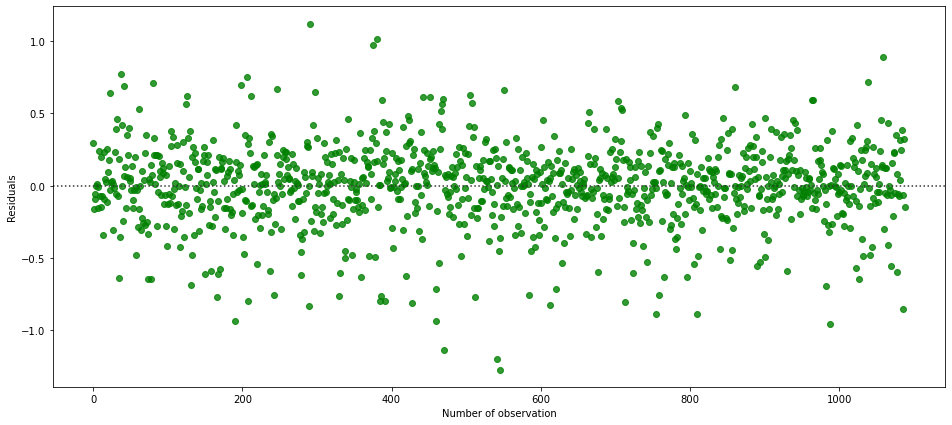

P-value: 2.7120318482692005e-21
Significant evidence of heteroskedasticity in the residuals was detected.


In [82]:
plt.figure(figsize=(16,7))
sns.residplot(x=np.arange(len(model1.resid)), y=model1.resid, lowess=False, color="g")
#plt.title('Residual plot')
plt.xlabel('Number of observation')
plt.ylabel('Residuals')
plt.show()

white_test1 = het_white(model1.resid, X1)
p_value = white_test1[1]

print(f'P-value: {p_value}')

# Interpretacja wyników testu
alpha = 0.05
if p_value > alpha:
    print('There is no significant evidence of heteroskedasticity in the residuals.')
else:
    print('Significant evidence of heteroskedasticity in the residuals was detected.')

For the estimated model together with a p-value for the White's test that is close to zero which supports the rejection of the null hypothesis and acceptance of the alternative hypothesis which states that significant evidence of **heteroskedasticity** in the residuals was detected.

<br>

#### Breusch Pagan Test

In [83]:
bp_test = het_breuschpagan(model1.resid, X1)

print(f"LR Statistic: {bp_test[0]}")
print(f"P-value: {bp_test[1]}")

LR Statistic: 188.34401710841854
P-value: 2.116264093284987e-30


On the other hand, after applying the Breuch Pagan test, p-value close to 0 was obtained, which means that $H_1$ should be accepted, stating that the residuals are **heteroskedastic**.\
The resulting test result has consequences, the presence of heteroskedasticity indicates that the variance of the residuals is unstable depending on the level of the independent variables. This effect may influence the incorrect estimation of the significance of the model parameters.

<br>

### Testing the normality of the error variable

Before testing the normality of the random component, it is useful to present the distribution of the residuals together with the fitted Gauss curve.

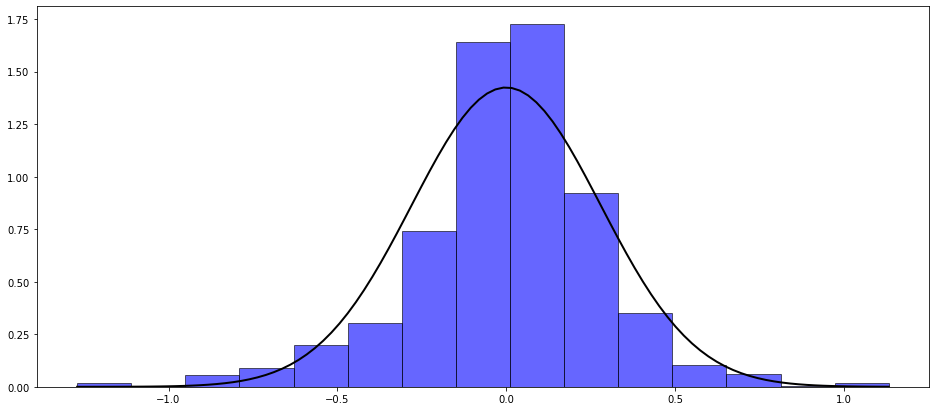

In [84]:
plt.figure(figsize=(16,7))
plt.hist(model1.resid, bins=15, density=True, alpha=0.6, color='b', edgecolor='black')

# Wykres gęstości rozkładu normalnego
xmin, xmax = min(model1.resid), max(model1.resid)
x = np.linspace(xmin, xmax, 100)
mu, std = np.mean(model1.resid), np.std(model1.resid)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [85]:
print("Skweness:", skew(model1.resid))
print("Kurtosis:", kurtosis(model1.resid)+3)

Skweness: -0.4756548751949623
Kurtosis: 5.045496534883308


Looking at the histogram above, the 'fat tails' corresponding to outliers catch our eye. When describing the distribution of the residuals, it will be helpful to calculate the skewness and kurtosis for the residuals in the model. A skewness of -0.44 means that the distribution of the data is slightly asymmetric; a negative value indicates the dominance of values on the left side of the histogram, i.e. smaller than the mean. On the other hand, a kurtosis of 5.03 means that the distribution is leptokurtic.

<br>

#### Shapiro-Wilk Test

In [86]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(model1.resid)
print(f'Statystyka testu Shapiro-Wilka: {shapiro_test_statistic}')
print(f'Wartość P-Value: {shapiro_p_value}')

Statystyka testu Shapiro-Wilka: 0.9655001163482666
Wartość P-Value: 2.133126905025525e-15


The p-value for the Shapiro-Wilk test is close to zero, meaning that it is significantly lower than the significance level $α$ = 0.05. Such a low p-value suggests that we can reject the null hypothesis that the distribution of the residuals is normal.

<br>

#### Jarque Bera Test

In [87]:
jarque_bera_test_statistic, jarque_bera_p_value = stats.jarque_bera(model1.resid)

print(f'Statystyka testu Jarque-Bera: {jarque_bera_test_statistic}')
print(f'Wartość P-Value: {jarque_bera_p_value}')

Statystyka testu Jarque-Bera: 230.91547656157275
Wartość P-Value: 0.0


For the Jarque-Bera test, a p-value of 7.20e-51 was obtained. This p-value is significantly lower than the accepted significance level $α$=0.05, leading to the rejection of the null hypothesis, which assumes the normality of the distribution of the residuals. The results obtained indicate that the residuals of the model do not meet the assumption of normality of the residuals.

<br>

## Generalised normal linear regression model

Due to the presence of heteroscedasticity in the residuals of the model with the logged variable, we decided to generalize the model to a generalized linear normal regression model. The focus was on constructing an auxiliary model consisting of the most correlated logarithms of the squared OLS residuals with its explanatory variables.

In [88]:
residue = np.log(np.square(model1.resid))

In [89]:
data_matrix_1['ln(eps^2)'] = residue
corr_matrix = data_matrix_1.iloc[:, 2:]
order = ['ln(eps^2)'] + [col for col in corr_matrix.columns if col != 'ln(eps^2)']
corr_matrix = corr_matrix[order]
corr_matrix.corr().style.applymap(highlight_high_corr)

,ln(eps^2),Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
ln(eps^2),1.000000,0.259666,-0.254807,-0.237927,-0.222196,-0.195827,-0.161216,-0.156941,-0.062923,-0.036672,-0.135477,-0.169348,-0.122237,-0.286258,-0.259044,-0.211472,-0.145752,-0.045693,-0.047564
Pk,0.259666,1.000000,-0.466756,-0.490256,-0.483405,-0.454901,-0.370497,-0.221541,-0.093182,-0.129903,-0.243554,-0.300402,-0.357921,-0.529916,-0.518731,-0.443255,-0.313912,-0.120174,-0.130483
G,-0.254807,-0.466756,1.000000,0.957775,0.870933,0.830890,0.723363,0.390052,0.200675,0.267136,0.506918,0.586378,0.662863,0.809705,0.718800,0.619416,0.520772,0.050958,0.086817
TOTMP,-0.237927,-0.490256,0.957775,1.000000,0.955797,0.856596,0.807439,0.329807,0.226356,0.285739,0.486096,0.604175,0.788378,0.868239,0.819447,0.634300,0.614254,0.006150,0.044415
TOTPTS,-0.222196,-0.483405,0.870933,0.955797,1.000000,0.815652,0.805214,0.295048,0.241526,0.305864,0.471038,0.603127,0.866184,0.836521,0.892399,0.601983,0.625374,-0.010010,0.038069
TOTTRB,-0.195827,-0.454901,0.830890,0.856596,0.815652,1.000000,0.530630,0.455687,0.002492,0.077491,0.492278,0.532899,0.713649,0.722448,0.679522,0.870007,0.325254,0.288206,0.317770
TOTAST,-0.161216,-0.370497,0.723363,0.807439,0.805214,0.530630,1.000000,0.129568,0.273156,0.313121,0.359197,0.524696,0.784208,0.699950,0.695750,0.305582,0.886307,-0.289270,-0.214330
FG%,-0.156941,-0.221541,0.390052,0.329807,0.295048,0.455687,0.129568,1.000000,-0.068643,-0.086308,0.733803,0.579959,0.221669,0.352006,0.324794,0.568740,0.032015,0.373851,0.397973
3P%,-0.062923,-0.093182,0.200675,0.226356,0.241526,0.002492,0.273156,-0.068643,1.000000,0.403928,0.195477,0.363645,0.189570,0.291714,0.312363,-0.129097,0.349034,-0.383567,-0.389573
FT%,-0.036672,-0.129903,0.267136,0.285739,0.305864,0.077491,0.313121,-0.086308,0.403928,1.000000,0.203103,0.267845,0.221499,0.348767,0.379635,-0.039158,0.360427,-0.314452,-0.312394


<br>

### Building an auxiliary model

In [90]:
d = [0, 7, 8, 9, 10, 11, 12, 13, 17, 18, 19]
auxiliary_matrix = data_matrix_1.drop(data_matrix_1.columns[d], axis=1)

In [91]:
order1 = ['ln(eps^2)'] + [col for col in auxiliary_matrix.columns if col != 'ln(eps^2)']
auxiliary_matrix = auxiliary_matrix[order1]
auxiliary_matrix

,ln(eps^2),Const,Pk,G,TOTMP,TOTPTS,TOTTRB,MPG,PPG,RPG
0,-2.283672,1,1,781.0,25903.0,12884.0,7232.0,33.2,16.5,9.3
1,-3.982184,1,2,1335.0,47117.0,21813.0,5269.0,35.3,16.3,3.9
2,-5.364147,1,3,586.0,15628.0,8553.0,1087.0,26.7,14.6,1.9
3,-6.736493,1,4,629.0,17983.0,8094.0,1774.0,28.6,12.9,2.8
4,-7.639026,1,5,966.0,29481.0,12914.0,4002.0,30.5,13.4,4.1
...,...,...,...,...,...,...,...,...,...,...
1571,-2.058107,1,51,116.0,1044.0,325.0,227.0,9.0,2.8,2.0
1575,-0.256658,1,55,64.0,973.0,183.0,87.0,15.2,2.9,1.4
1576,-4.814499,1,56,44.0,457.0,97.0,69.0,10.4,2.2,1.6
1578,-2.407123,1,58,123.0,1696.0,846.0,225.0,13.8,6.9,1.8


In [92]:
y2 = auxiliary_matrix['ln(eps^2)']

X2 = auxiliary_matrix.iloc[:, 1:].values
X2 = X2.astype(float)

In [93]:
auxiliary_model = sm.OLS(y2, X2).fit()

In [94]:
auxiliary_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ln(eps^2)   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     17.72
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           5.19e-25
Time:                        20:26:57   Log-Likelihood:                -2425.0
No. Observations:                1089   AIC:                             4868.
Df Residuals:                    1080   BIC:                             4913.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0253      0.347     -8.723      0.000      -3.706      -2.345
x1             0.0219      0.005      4.191      0.000       0.012       0.032
x2            -0.0033      0.001     -3.903      0.000      -0.005      -0.002
x3             0.0001    6.5e-05      1.658      0.098   -1.98e-05       0.000
x4         -4.574e-05      0.000     -0.452      0.652      -0.000       0.000
x5             0.0002      0.000      1.575      0.115   -5.32e-05       0.000
x6            -0.0556      0.041     -1.358      0.175      -0.136       0.025
x7            -0.0146      0.077     -0.191      0.849      -0.165       0.136
x8            -0.1399      0.101     -1.381      0.168      -0.339       0.059
==============================================================================
Omnibus:                      350.501   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1330.823
Skew:                          -1.512   Prob(JB):                    1.04e-289
Kurtosis:                       7.493   Cond. No.                     8.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
sigma = np.exp(np.dot(X2, auxiliary_model.params))

In [96]:
data_matrix_1['sigma^2'] = sigma
data_matrix_1

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,...,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight,ln(eps^2),sigma^2
0,2.708050,1,1,781.0,25903.0,12884.0,7232.0,1985.0,0.447,0.295,...,1.4,22.3,33.2,16.5,9.3,2.5,208.0,104.0,-2.283672,0.005435
1,2.833213,1,2,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,0.317,...,3.3,62.5,35.3,16.3,3.9,6.7,193.0,82.0,-3.982184,0.007178
2,2.197225,1,3,586.0,15628.0,8553.0,1087.0,2079.0,0.442,0.354,...,-0.8,4.5,26.7,14.6,1.9,3.5,185.0,73.0,-5.364147,0.004796
3,2.302585,1,4,629.0,17983.0,8094.0,1774.0,1296.0,0.417,0.397,...,0.2,9.9,28.6,12.9,2.8,2.1,203.0,104.0,-6.736493,0.005280
4,2.708050,1,5,966.0,29481.0,12914.0,4002.0,2945.0,0.434,0.300,...,0.1,15.8,30.5,13.4,4.1,3.0,196.0,88.0,-7.639026,0.005895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,1.386294,1,51,116.0,1044.0,325.0,227.0,80.0,0.491,0.157,...,-3.7,-0.5,9.0,2.8,2.0,0.7,198.0,99.0,-2.058107,0.051449
1575,0.000000,1,55,64.0,973.0,183.0,87.0,130.0,0.345,0.190,...,-5.1,-0.8,15.2,2.9,1.4,2.0,190.0,86.0,-0.256658,0.049746
1576,0.693147,1,56,44.0,457.0,97.0,69.0,29.0,0.304,0.222,...,-5.5,-0.4,10.4,2.2,1.6,0.7,198.0,91.0,-4.814499,0.065953
1578,1.386294,1,58,123.0,1696.0,846.0,225.0,167.0,0.417,0.355,...,-2.1,0.0,13.8,6.9,1.8,1.4,196.0,81.0,-2.407123,0.045505


In [97]:
columns_to_skip = [1,-1]

data_matrix_2 = data_matrix_1.copy()

for i, col in enumerate(data_matrix.columns):
    if i not in columns_to_skip:
        data_matrix_2[col] = data_matrix_2[col] / np.sqrt(data_matrix_2['sigma^2'])

In [98]:
# Weighted matrix
data_matrix_2 = data_matrix_2.iloc[:, :-2]
data_matrix_2

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
0,36.733419,1,13.564527,10593.895375,351361.935838,174765.362365,98098.657298,26925.585555,6.063343,4.001535,10.431121,1.614179,18.990337,302.488946,450.342287,223.814691,126.150099,33.911317,2821.421559,1410.71078
1,33.440207,1,23.605852,15756.906164,556118.462710,257457.224083,62189.616912,105825.034206,5.500163,3.741528,8.604333,1.746833,38.949656,737.682873,416.643287,192.387693,46.031411,79.079604,2277.964711,967.839929
2,31.728929,1,43.321374,8462.108297,225675.475189,123509.235941,15696.777677,30021.711858,6.382682,5.111922,13.068614,1.111915,-11.552366,64.982060,385.560224,210.830685,27.436870,50.541602,2671.484701,1054.153423
3,31.689686,1,55.050623,8656.710439,247493.837555,111394.935282,24414.951222,17836.401795,5.739027,5.463774,10.913786,1.224876,2.752531,136.250291,393.611953,177.538259,38.535436,28.901577,2793.819108,1431.316193
4,35.270698,1,65.121942,12581.559280,383971.997021,168196.952937,52123.602730,38356.824098,5.652585,3.907317,9.820389,1.015902,1.302439,205.785338,397.243849,174.526806,53.399993,39.073165,2552.780144,1146.146187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,6.111760,1,224.843848,511.409538,4602.685838,1432.828446,1000.775561,352.696233,2.164673,0.692166,2.301343,0.273340,-16.312201,-2.204351,39.678326,12.344368,8.817406,3.086092,872.923176,436.461588
1575,0.000000,1,246.595827,286.947871,4362.504357,820.491570,390.069763,582.862864,1.546828,0.851876,2.456991,0.026901,-22.866159,-3.586848,68.150119,13.002325,6.276985,8.967121,851.876493,385.586202
1576,2.699041,1,218.058035,171.331313,1779.509320,377.707667,268.678650,112.922911,1.183744,0.864444,1.460210,-0.109029,-21.416414,-1.557557,40.496492,8.566566,6.230230,2.725725,770.990909,354.344307
1578,6.498686,1,271.893042,576.600762,7950.527577,3965.888167,1054.757491,782.864449,1.954817,1.664173,3.618990,0.225015,-9.844403,0.000000,64.691793,32.345896,8.438060,6.562936,918.810970,379.712697


In [99]:
auxiliary_model_resid = auxiliary_model.resid / np.sqrt(data_matrix_1['sigma^2'])

<br>

### Weighted least squares method

In [100]:
y3 = data_matrix_2['Yrs'].to_numpy()

In [101]:
X3 = data_matrix_2.iloc[:, 1:].values
X3 = X3.astype(float)

In [102]:
model2 = sm.OLS(y3, X3).fit()

In [103]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     2181.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:26:59   Log-Likelihood:                -2211.4
No. Observations:                1089   AIC:                             4461.
Df Residuals:                    1070   BIC:                             4556.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.9245      0.723     -6.815      0.000      -6.342      -3.507
x1             0.0047      0.001      4.291      0.000       0.003       0.007
x2             0.0020      0.000     10.261      0.000       0.002       0.002
x3         -2.554e-05   9.45e-06     -2.702      0.007   -4.41e-05   -6.99e-06
x4         -2.014e-07   1.03e-05     -0.020      0.984   -2.04e-05       2e-05
x5          4.064e-05   1.66e-05      2.443      0.015    7.99e-06    7.33e-05
x6         -1.317e-05   2.12e-05     -0.621      0.535   -5.48e-05    2.84e-05
x7             0.3453      0.216      1.600      0.110      -0.078       0.769
x8             0.1591      0.067      2.365      0.018       0.027       0.291
x9            -0.1918      0.098     -1.957      0.051      -0.384       0.000
x10            0.4267      0.390      1.093      0.274      -0.339       1.192
x11            0.0096      0.009      1.036      0.300      -0.009       0.028
x12           -0.0031      0.001     -2.198      0.028      -0.006      -0.000
x13            0.0071      0.006      1.196      0.232      -0.005       0.019
x14            0.0001      0.007      0.016      0.988      -0.014       0.014
x15           -0.0413      0.013     -3.124      0.002      -0.067      -0.015
x16            0.0395      0.017      2.378      0.018       0.007       0.072
x17            0.0081      0.001      7.514      0.000       0.006       0.010
x18           -0.0004      0.001     -0.444      0.657      -0.002       0.001
==============================================================================
Omnibus:                      165.606   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              438.774
Skew:                          -0.801   Prob(JB):                     5.27e-96
Kurtosis:                       5.666   Cond. No.                     2.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<br>

### Testing for homoskedasticity of the error variable

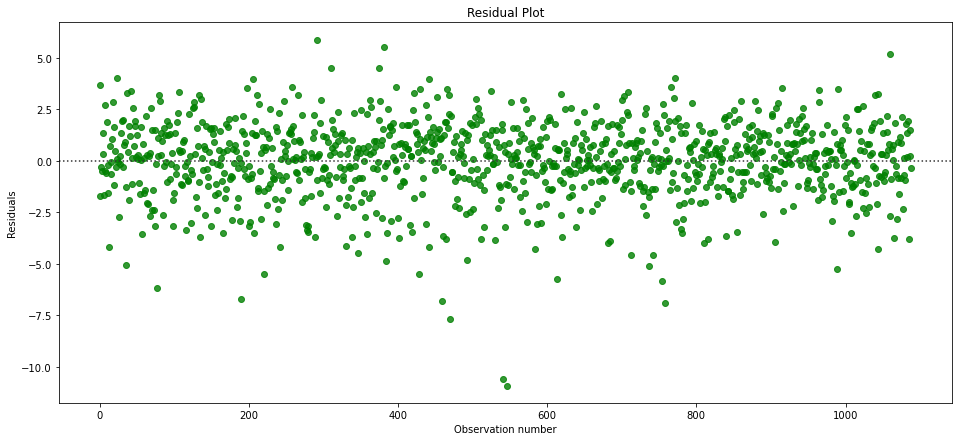

P-value: 1.1975094330236923e-05
Significant evidence of heteroskedasticity in the residuals was detected.


In [104]:
plt.figure(figsize=(16,7))
sns.residplot(x=np.arange(len(model2.resid)), y=model2.resid, lowess=False, color="g")
plt.title('Residual Plot')
plt.xlabel('Observation number')
plt.ylabel('Residuals')
plt.show()

_, p_value, _, _ = het_breuschpagan(model2.resid, X3)
print(f'P-value: {p_value}')

# Interpretacja wyników testu
alpha = 0.05
if p_value > alpha:
    print('There is no significant evidence of heteroskedasticity in the residuals.')
else:
    print('Significant evidence of heteroskedasticity in the residuals was detected.')

After applying the Breuch Pagan test, the p-value is close to 0 so we reject $H_0$ and accept $H_1$ stating the **heteroskedasticity** of the residuals.

<br>

### Testing the normality of the error variable

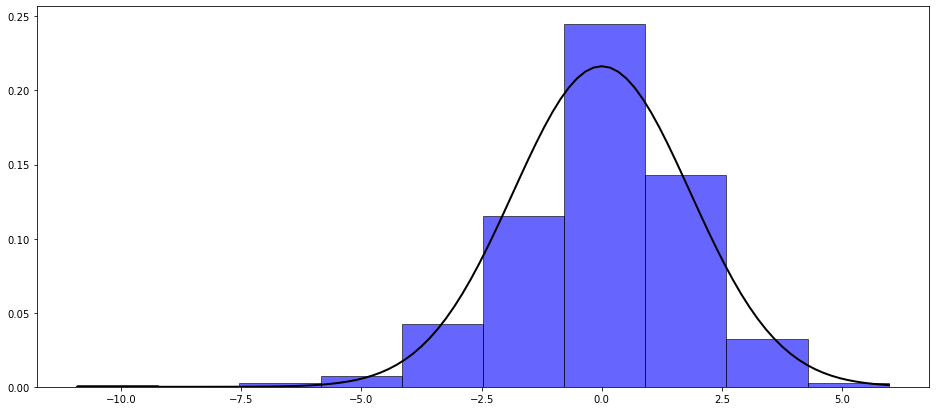

In [105]:
plt.figure(figsize=(16,7))
plt.hist(model2.resid, bins=10, density=True, alpha=0.6, color='b', edgecolor='black')

# Wykres gęstości rozkładu normalnego
xmin, xmax = min(model2.resid), max(model2.resid)
x = np.linspace(xmin, xmax, 100)
mu, std = np.mean(model2.resid), np.std(model2.resid)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [106]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(model2.resid)
print(f'Statystyka testu Shapiro-Wilka: {shapiro_test_statistic}')
print(f'Wartość P-Value: {shapiro_p_value}')

Statystyka testu Shapiro-Wilka: 0.9669497609138489
Wartość P-Value: 4.9640497163945096e-15


The p-value for the Shapiro-Wilk test is close to zero, meaning that it is significantly lower than the significance level $α$ = 0.05. Such a low p-value suggests that we can reject the null hypothesis that the distribution of the residuals is normal.

<br>

## Reduced base model

After analysing and comparing different regression models, including a model with a logarithmic variable and generalised normal linear regression model, it was found that the 'first-order' model was the best one. This model, despite some limitation of not having a normalised random component, has a better fit to the data and had more stable parameter estimates due to the absence of the heteroskedasticity problem of the residuals. The 'first-order' model, despite some imperfections, achieved a satisfactory level of fit to the data, indicating its usefulness in predicting the number of seasons spent in the NBA league based on the available independent variables. In addition, this model may be more intuitive and easier to interpret, which is also important in terms of communicating the results of the analysis. However, the first-round model needs further optimisation and refinement by reducing irrelevant parameters.

<br>

In [107]:
X_reduced = data_matrix.drop(['Yrs', '3P%', 'Weight', 'MPG', 'BPM', 'RPG', 'TOTPTS', 'TOTAST', 'APG', 'TOTTRB', 'Pk', 'FG%', 'WS/48', 'FT%', 'VORP'], axis=1)

In [108]:
X_reduced = X_reduced.astype(float)

In [109]:
model_reduced = sm.OLS(y, X_reduced).fit()

In [110]:
model_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     5334.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:27:04   Log-Likelihood:                -1586.8
No. Observations:                1089   AIC:                             3184.
Df Residuals:                    1084   BIC:                             3209.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Const         -1.2603      0.713     -1.767      0.077      -2.659       0.139
G              0.0169      0.000     47.327      0.000       0.016       0.018
TOTMP         -0.0001   1.37e-05     -9.230      0.000      -0.000   -9.94e-05
PPG            0.0467      0.012      3.813      0.000       0.023       0.071
Height         0.0131      0.004      3.688      0.000       0.006       0.020
==============================================================================
Omnibus:                      183.706   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.268
Skew:                           0.940   Prob(JB):                     3.00e-90
Kurtosis:                       5.356   Cond. No.                     3.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Before discussing the estimation results for the "second order" model, it is important to emphasise that assumption 6 that the residuals are normal is not satisfied. In the case of large samples, we can assume that as the number of observations increases, the distribution converges to a standard normal distribution $(t→∞)$. Thus, inferences about the validity of the reduction and significance of the variables will be approximate. 

<br>

### Information criteria

In [111]:
pd.DataFrame({
    'AIC': [model.aic, model_reduced.aic],
    'BIC': [model.bic, model_reduced.bic]
}, index=['Base model', 'Reduced base model']).transpose()

,Base model,Reduced base model
AIC,3200.080991,3183.586992
BIC,3294.948278,3208.552068


In the case of the 'reduced base model', the Bayes criterion (BIC) was approximately 3209 while for the basic model containing all explanatory variables, it reached 3295. Comparing these results, we observe a lower BIC for the reduced model, suggesting that this model is more preferable from a Bayes criterion perspective. The BIC value for the model shown above is the lowest of all models containing only significant parameters at the $α=0.05$ level hence the best possible forecasting will be possible based on this model. For the 'reduced base model' model, the coefficient of determination is 95.2%, which is approximately the same as for the base model. This result suggests that, despite the reduction in the number of variables, the model's ability to explain variability in the data has not been significantly modified. Thus, the inference of model reduction is valid; it was possible to omit some of the variables without losing the predictive power of the model.

<br>

### Interpretation

- Free expression: -1.2603 in the case of our model, the interpretation of the free expression does not make sense and its significance is questionable
- **G** (number of matches played in career): 0.016949 means that if a player played approximately 59 more games in his career, then he would spend a season more in the NBA league, ceteris paribus
- **TOTMP** (total number of career minutes played): -0.000126 means that if the player had played approximately 7937 minutes more then he would have spent a season less in the NBA league, ceteris paribus
- **PPG** (career points per game average): 0.046661 means that if a player were to throw around 21.4 points per game more he would play a season more in the NBA league, ceteris paribus
- **Height** (the player's height in cm): 0.013102 means that if a player is approximately 77 cm taller then he would spend a season more in the league, ceteris paribus. When interpreting this result, it is important to note that a player's height has a significant impact on the length of his career in the league, however, its importance is apparent when there are large differences in height between players.

<br>

At this point, it would be important to note the estimated value of the parameter for the TOTMP variable, which is negative, which is hardly intuitive. It should be noted that the TOTMP variable is related to the G variable, as it is not possible to spend minutes on the pitch without playing in a match. The graph below shows the relationship between these variables, with the TOTMP variable on the X axis and the G variable on the Y axis.

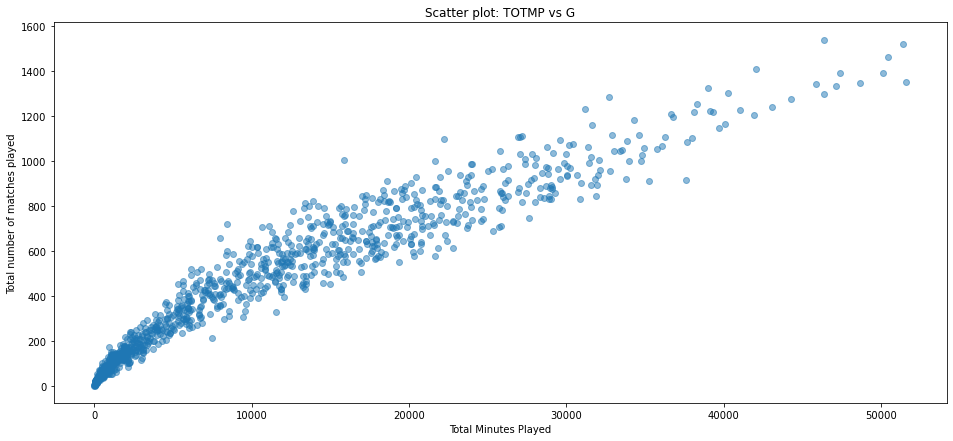

In [112]:
plt.figure(figsize=(16, 7))

plt.scatter(data_matrix['TOTMP'], data_matrix['G'], alpha=0.5)
plt.title('Scatter plot: TOTMP vs G')
plt.xlabel('Total Minutes Played')
plt.ylabel('Total number of matches played')
plt.show()

Analysing the graph, it can be seen that the points line up along the line that is the graph of the function, which is concave, confirming the results obtained. It is also important to focus on the values of the parameters standing next to these variables, 0.0171 for the G variable is significantly greater than -0.0001 for the TOTMP variable, which suggests that the number of games played has a greater impact on the number of seasons spent in the NBA than the TOTMP variable which tells us the total number of minutes played by the player. Note that it is not possible to play minutes without attending games, so it is difficult to interpret the two variables separately. This relationship suggesting that it is best to play in every possible match but without playing a huge number of minutes is easily explained, it is related to possible injuries. More exploited players have a greater chance of suffering an injury that will rule them out of at least a few games, which, according to the estimated model, strongly affects the length of a player's NBA career.

<br>

### Model-based forecasting

In [113]:
test_df = pd.read_excel(r'C:\Users\GRZEGORZ\OneDrive\Pulpit\NBA data test.xlsx')
test_df.head()

,Player,Yrs,G,TOTMP,TOTPTS,PPG,WS/48,Height
0,Pervis Ellison,11,474,11593,4494,9.481013,0.090,6-9
1,Danny Ferry,13,917,18133,6439,7.021810,0.092,6-10
2,Sean Elliott,12,742,24502,10544,14.210243,0.109,6-8
3,Glen Rice,15,1000,34985,18336,18.336000,0.122,6-8
4,J.R. Reid,11,672,15370,5680,8.452381,0.070,6-9


In [114]:
def height_to_cm(height):
    feet, inches = map(int, height.split('-'))
    total_inches = feet * 12 + inches
    cm = total_inches * 2.54
    return cm

test_df['Height'] = test_df['Height'].apply(height_to_cm)
test_df['Height'] = round(test_df['Height'])

In [115]:
y_test = test_df['Yrs'].to_numpy()

In [116]:
test_df = test_df.drop(['WS/48', 'TOTPTS'], axis=1)

In [117]:
X_test = test_df.iloc[:,2:].values
X_test = X_test.astype(float)

In [118]:
predictions = model_reduced.predict(sm.add_constant(X_test))

In [119]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.9657485088356896
R-squared: 0.9630358334175915


Mean squared error (MSE) calculated from the formula:\
\begin{equation}
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{equation}
and the coefficient of determination. Starting the discussion with the R^2 coefficient, which is approximately 96.2%, this compares to approximately 95.2% for the 'second order' model based on the learning data, a set consisting of 1089 observations. The result for R^2 for the 'second-order' model based on test data consisting of 100 observations, being more than 1% higher than R^2 for the learning data, means that our model excellently explains the number of seasons a player has spent in the NBA league regardless of the data provided for the model.\
An MSE value of approximately 0.96 means that, on average, we are wrong by 0.96 seasons. In the context of our data, values of the individual random components being greater than 0 and at the same time less than 1 means that the model has predicted the exact number of seasons, at this point it should be emphasised that, for example, values of 5.01 $(ε ̂=0.99)$ and 5.99 $(ε ̂=0.01)$ mean that the player has played 6 seasons despite the fact that they are significantly different.

<br>

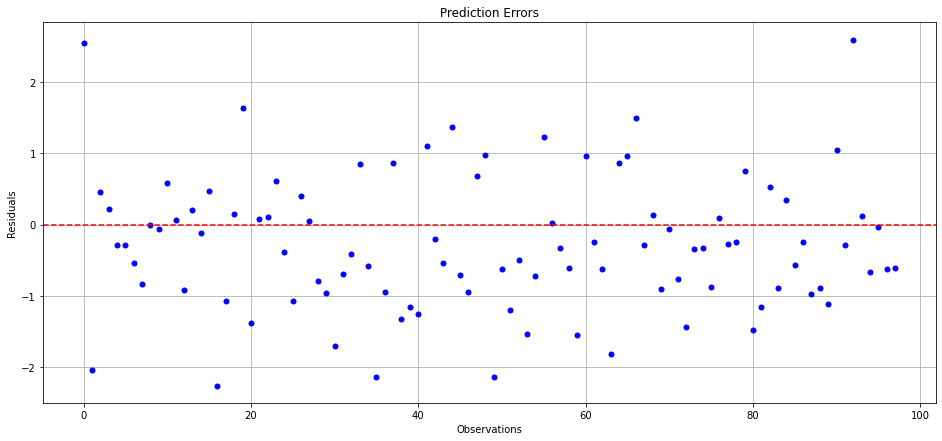

In [120]:
errors = y_test - predictions

plt.figure(figsize=(16, 7))
plt.plot(np.arange(len(errors)), errors, marker='o', linestyle='', color='blue', markersize=5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Prediction Errors')
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

Analysing the graph of the residuals, the values in the range: 
- [-3;-2) mean that the model overestimated the number of seasons by 3
- [-2;-1) mean that the model overestimated the number of seasons by 2
- [-1;0) mean that the model overestimated the number of seasons by 1
- [0;1) means that the model has correctly predicted the value of the explained variable
- [1;2) means that the model underestimated the number of seasons by 1
- [2;3) means that the model underestimated the number of seasons by 2

<br>

## Non-linear model

In order to more accurately analyse the impact of player statistics on the length of their NBA careers, it is worth considering a non-linear model. Linear models may not fully capture the complexity of the relationships between variables. A reduced based model that included four variables and a free expression will be extended to include the squares and products of these variables. At this point it is worth emphasising the non-linear model, which will be discussed in this subsection, is linear with respect to the parameters. The non-linear model, like the previously described linear models, will be estimated using the least squares method. 

In [121]:
data_matrix_II = data_matrix.drop(columns=['Const', 'Pk', 'TOTPTS', 'TOTTRB', 'TOTAST', 'FG%', '3P%', 'FT%', 'WS/48', 'BPM', 'VORP', 'MPG', 'RPG', 'APG', 'Weight'])

In [122]:
# Kwadraty zmiennych objaśniających
for col in data_matrix_II.columns[1:]:
    new_col_name = f"{col}^2"
    data_matrix_II[new_col_name] = data_matrix_II[col] ** 2

In [123]:
# Iloczyny zmiennych
data_matrix_II['G*TOTMP'] = data_matrix_II['G'] * data_matrix_II['TOTMP']
data_matrix_II['G*PPG'] = data_matrix_II['G'] * data_matrix_II['PPG']
data_matrix_II['G*Height'] = data_matrix_II['G'] * data_matrix_II['Height']
data_matrix_II['TOTMP*PPG'] = data_matrix_II['TOTMP'] * data_matrix_II['PPG']
data_matrix_II['TOTMP*Height'] = data_matrix_II['TOTMP'] * data_matrix_II['Height']
data_matrix_II['PPG*Height'] = data_matrix_II['PPG'] * data_matrix_II['Height']

In [124]:
data_matrix_II

,Yrs,G,TOTMP,PPG,Height,G^2,TOTMP^2,PPG^2,Height^2,G*TOTMP,G*PPG,G*Height,TOTMP*PPG,TOTMP*Height,PPG*Height
0,15.0,781.0,25903.0,16.5,208.0,609961.0,6.709654e+08,272.25,43264.0,20230243.0,12886.5,162448.0,427399.5,5387824.0,3432.0
1,17.0,1335.0,47117.0,16.3,193.0,1782225.0,2.220012e+09,265.69,37249.0,62901195.0,21760.5,257655.0,768007.1,9093581.0,3145.9
2,9.0,586.0,15628.0,14.6,185.0,343396.0,2.442344e+08,213.16,34225.0,9158008.0,8555.6,108410.0,228168.8,2891180.0,2701.0
3,10.0,629.0,17983.0,12.9,203.0,395641.0,3.233883e+08,166.41,41209.0,11311307.0,8114.1,127687.0,231980.7,3650549.0,2618.7
4,15.0,966.0,29481.0,13.4,196.0,933156.0,8.691294e+08,179.56,38416.0,28478646.0,12944.4,189336.0,395045.4,5778276.0,2626.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,4.0,116.0,1044.0,2.8,198.0,13456.0,1.089936e+06,7.84,39204.0,121104.0,324.8,22968.0,2923.2,206712.0,554.4
1575,1.0,64.0,973.0,2.9,190.0,4096.0,9.467290e+05,8.41,36100.0,62272.0,185.6,12160.0,2821.7,184870.0,551.0
1576,2.0,44.0,457.0,2.2,198.0,1936.0,2.088490e+05,4.84,39204.0,20108.0,96.8,8712.0,1005.4,90486.0,435.6
1578,4.0,123.0,1696.0,6.9,196.0,15129.0,2.876416e+06,47.61,38416.0,208608.0,848.7,24108.0,11702.4,332416.0,1352.4


In [125]:
y_II = data_matrix_II['Yrs'].to_numpy()

In [126]:
X_II = data_matrix_II.iloc[:, 1:].values
X_II = X_II.astype(float)

In [127]:
model_II = sm.OLS(y_II, sm.add_constant(X_II)).fit()

In [128]:
model_II.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1595.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:27:17   Log-Likelihood:                -1558.3
No. Observations:                1089   AIC:                             3147.
Df Residuals:                    1074   BIC:                             3222.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0962     12.565     -0.167      0.868     -26.751      22.559
x1             0.0297      0.008      3.681      0.000       0.014       0.045
x2            -0.0006      0.000     -1.826      0.068      -0.001    4.15e-05
x3             0.2793      0.253      1.102      0.271      -0.218       0.777
x4             0.0135      0.126      0.107      0.915      -0.233       0.260
x5         -1.114e-05   3.36e-06     -3.316      0.001   -1.77e-05   -4.55e-06
x6         -6.559e-09   4.25e-09     -1.545      0.123   -1.49e-08    1.77e-09
x7             0.0022      0.003      0.849      0.396      -0.003       0.007
x8          1.822e-05      0.000      0.058      0.954      -0.001       0.001
x9          5.005e-07   2.36e-07      2.125      0.034    3.83e-08    9.63e-07
x10           -0.0001      0.000     -0.770      0.441      -0.000       0.000
x11        -3.209e-05   4.01e-05     -0.800      0.424      -0.000    4.66e-05
x12         6.157e-06   6.21e-06      0.991      0.322   -6.03e-06    1.83e-05
x13         1.496e-06   1.53e-06      0.979      0.328    -1.5e-06    4.49e-06
x14           -0.0017      0.001     -1.344      0.179      -0.004       0.001
==============================================================================
Omnibus:                      163.519   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              339.076
Skew:                           0.874   Prob(JB):                     2.35e-74
Kurtosis:                       5.101   Cond. No.                     1.82e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<br>

### Testing for homoskedasticity of the error variable

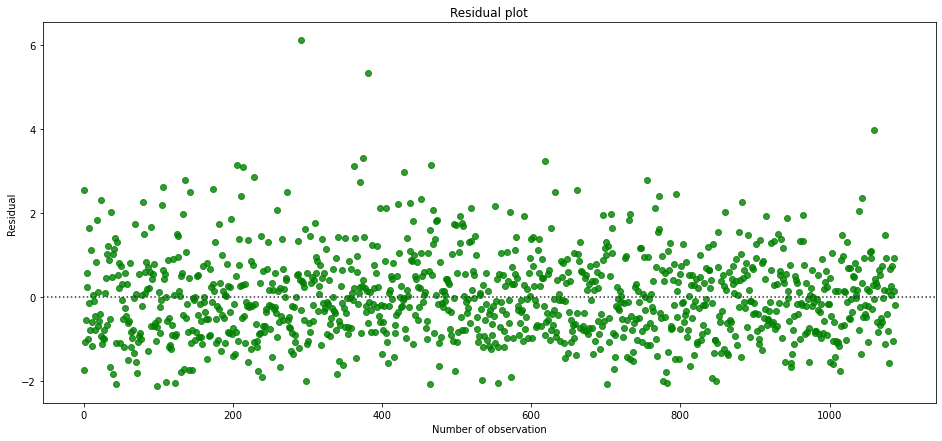

P-value: 0.07669519418185262
There is no significant evidence of heteroskedasticity in the residuals.


In [129]:
plt.figure(figsize=(16,7))
sns.residplot(x=np.arange(len(model_II.resid)), y=model_II.resid, lowess=False, color="g")
plt.title('Residual plot')
plt.xlabel('Number of observation')
plt.ylabel('Residual')
plt.show()

bp_test = het_breuschpagan(model_II.resid, model_II.model.exog)
bp_statistic, bp_pvalue, _, _ = bp_test
print(f'P-value: {bp_pvalue}')

alpha = 0.05
if bp_pvalue > alpha:
    print('There is no significant evidence of heteroskedasticity in the residuals.')
else:
    print('Significant evidence of heteroskedasticity in the residuals was detected.')

The results of the Breuch-Pagan test carried out indicated that the p-value was 0.07. With an assumed significance level of $α = 0.05$, the p-value obtained is greater than α. This means that there are no grounds to reject the null hypothesis of homoskedasticity. In view of the result of the Breuch-Pagan test, we can conclude that the model meets the assumption of homoskedasticity, which positively affects its overall reliability and usefulness in predicting the career length of players in the NBA.

<br>

### Testing the normality of the error variable

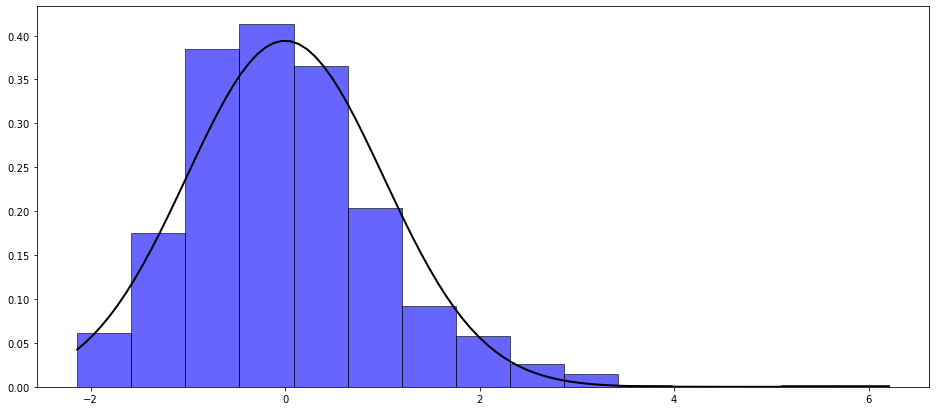

In [131]:
plt.figure(figsize=(16,7))
plt.hist(model_II.resid, bins=15, density=True, alpha=0.6, color='b', edgecolor='black')

# Wykres gęstości rozkładu normalnego
xmin, xmax = min(model_II.resid), max(model_II.resid)
x = np.linspace(xmin, xmax, 100)
mu, std = np.mean(model_II.resid), np.std(model_II.resid)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

In [132]:
print("Skewness:", skew(model_II.resid))
print("Kurtosis:", kurtosis(model_II.resid))

Skewness: 0.8743093029969933
Kurtosis: 2.1012112200301125


In [133]:
stat, p_value = stats.shapiro(model_II.resid)

print("Test Statistic:", stat)
print("P-value:", p_value)

Test Statistic: 0.9642444252967834
P-value: 1.0466822128121648e-15


The result of the Shapiro-Wilk test tells us that the null hypothesis is rejected due to the p-value, which is close to zero. With the results obtained, we can conclude that the distribution of the residuals in the model is not normal.

<br>

In [134]:
jb = sms.jarque_bera(model_II.resid)
print("Jarque-Bera Test Statistic:", jb[0])
print("P-value:", jb[1])

Jarque-Bera Test Statistic: 339.0762862760487
P-value: 2.3470371454793853e-74


The test results again indicate the need to reject the null hypothesis of non-normality of the residuals in the model due to the very low p-value.

<br>

## Reduced non-linear model

In [135]:
X_II_reduced = data_matrix_II.drop(['Yrs', 'Height^2', 'G*PPG', 'G*Height', 'TOTMP*Height', 'TOTMP*PPG', 'PPG', 'TOTMP^2'], axis=1)

In [136]:
X_II_reduced = X_II_reduced.astype(float)

In [137]:
model_II_reduced = sm.OLS(y_II, sm.add_constant(X_II_reduced)).fit()

In [138]:
model_II_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     3195.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:27:46   Log-Likelihood:                -1560.9
No. Observations:                1089   AIC:                             3138.
Df Residuals:                    1081   BIC:                             3178.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1764      0.698     -1.685      0.092      -2.546       0.194
G              0.0215      0.001     22.996      0.000       0.020       0.023
TOTMP         -0.0002   3.39e-05     -5.398      0.000      -0.000      -0.000
Height         0.0129      0.004      3.609      0.000       0.006       0.020
G^2        -6.459e-06   1.15e-06     -5.613      0.000   -8.72e-06    -4.2e-06
PPG^2          0.0038      0.001      3.418      0.001       0.002       0.006
G*TOTMP     1.494e-07   3.66e-08      4.086      0.000    7.76e-08    2.21e-07
PPG*Height    -0.0004      0.000     -2.796      0.005      -0.001      -0.000
==============================================================================
Omnibus:                      166.680   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.401
Skew:                           0.883   Prob(JB):                     4.95e-77
Kurtosis:                       5.150   Cond. No.                     3.25e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After the reduction of the non-linear model, the following variables remained in the simplified model:
- **G** - number of matches played
- **TOTMP** - total number of minutes played
- **Height** - player height
- **G^2** - number of matches played squared
- **PPG^2** - average number of points scored per game squared
- **G*TOTMP** - the product of the number of matches played and the total number of minutes played
- **PPG*Height** - the product of the average number of points scored per game and height 

<br>

In [139]:
aic_bic = pd.DataFrame({
    'Podstawowy': [model.aic, model.bic],
    'Podstawowy zredukowany': [model_reduced.aic, model_reduced.bic],
    'Nieliniowy': [model_II.aic, model_II.bic],
    'Nieliniowy zredukowany': [model_II_reduced.aic, model_II_reduced.bic]
}, index=['AIC', 'BIC'])

In [140]:
aic_bic = aic_bic.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]
).set_properties(**{
    'width': '150px'
})

In [141]:
pd.DataFrame({
    'AIC': [model.aic, model_reduced.aic, model_II.aic, model_II_reduced.aic],
    'BIC': [model.bic, model_reduced.bic, model_II.bic, model_II_reduced.bic]
}, index=['Base', 'Reduced base', 'Non-linear', 'Reduced non-linear']).transpose()

,Base,Reduced base,Non-linear,Reduced non-linear
AIC,3200.080991,3183.586992,3146.658482,3137.807919
BIC,3294.948278,3208.552068,3221.553709,3177.752040


Comparing the models using AIC and BIC will allow an objective assessment of which model better balances the accuracy of the fit with the simplicity of the structure. Lower AIC and BIC values indicate a better model that provides the most efficient fit with the least number of parameters. Focusing on the Bayesian information criterion (BIC), we note that by far the lowest BIC value is for the reduced non-linear model which means that it is the best of all the models presented in the paper. Due to the fact that the reduced non-linear model was found to be the best among all the models analysed, we can consider it as the ultimate model for explaining the career length of players in the NBA league.

<br>

### Interpretation

In order to better understand the impact of the different variables, calculations will be presented to show the effect of increasing the value of a variable by a unit. At this point, it is worth recalling the final model equation:  $Y_t=β_0+β_1 G_t+β_2 TOTMP_t+β_3 Height_t+β_4 G_t^2+β_5 PPG_t^2+β_6 (G_t*TOTMP_t )+β_7 (PPG_t*Height_t)$

In [142]:
filtered_data = data[data['Player'] != 'LeBron James']

min_values = filtered_data[['G', 'TOTMP', 'PPG', 'Height']].min()
max_values = filtered_data[['G', 'TOTMP', 'PPG', 'Height']].max()

mean_values = data[['G', 'TOTMP', 'PPG', 'Height']].mean()

summary_stats = pd.DataFrame({
    'Min': min_values,
    'Mean': mean_values,
    'Max': max_values
}).T

summary_stats_rounded = summary_stats.round(2)

In [143]:
summary_stats_rounded

,G,TOTMP,PPG,Height
Min,1.00,3.00,0.00,175.00
Mean,439.57,10775.74,7.68,200.23
Max,1541.00,51368.00,27.10,229.00


<br>

As an introduction, calculations will be shown to demonstrate the effect of increasing the value of the variable G (number of matches played) by a unit, in this case by 1 match.
$z_t=β_1 G_t+β_4 G_t^2+β_6 (G_t*〖TOTMP〗_t )+a_t$, where\
$a_t$ are the components independent of the variable G\
$z_t^*=β_1 (G_t+1)+β_4 (G_t^2+1)+β_6 [(G_t+1)*TOTMP_t ]+a_t$\
=$β_1+β_1 G_t+β_4 (G_t^2+2G_t+1)+β_6 (G_t*TOTMP_t+TOTMP_t )+a_t$\
=$β_1+β_1 G_t+β_4 G_t^2+β_4 (2G_t+1)+β_6 (G_t*TOTMP_t )+β_6 TOTMP_t+a_t$\
=$z_t+β_1+β_4 (2G_t+1)+β_6 TOTMP_t$

In [144]:
G_TOTMP = pd.DataFrame(index=['G_min', 'G_mean', 'G_max'], columns=['TOTMP_min', 'TOTMP_mean', 'TOTMP_max'])

G_TOTMP.at['G_min', 'TOTMP_min'] = model_II_reduced.params[1] + model_II_reduced.params[4]*(2+1) + model_II_reduced.params[6]*3
G_TOTMP.at['G_min', 'TOTMP_mean'] = model_II_reduced.params[1] + model_II_reduced.params[4]*(2+1) + model_II_reduced.params[6]*10775.74
G_TOTMP.at['G_min', 'TOTMP_max'] = model_II_reduced.params[1] + model_II_reduced.params[4]*(2+1) + model_II_reduced.params[6]*51563

G_TOTMP.at['G_mean', 'TOTMP_min'] = model_II_reduced.params[1] + model_II_reduced.params[4]*(2*439.57+1) + model_II_reduced.params[6]*3
G_TOTMP.at['G_mean', 'TOTMP_mean'] = model_II_reduced.params[1] + model_II_reduced.params[4]*(2*439.57+1) + model_II_reduced.params[6]*10775.74
G_TOTMP.at['G_mean', 'TOTMP_max'] = model_II_reduced.params[1] + model_II_reduced.params[4]*(2*439.57+1) + model_II_reduced.params[6]*51563

G_TOTMP.at['G_max', 'TOTMP_min'] = model_II_reduced.params[1] + model_II_reduced.params[4]*(2*1541+1) + model_II_reduced.params[6]*3
G_TOTMP.at['G_max', 'TOTMP_mean'] = model_II_reduced.params[1] + model_II_reduced.params[4]*(2*1541+1) + model_II_reduced.params[6]*10775.74
G_TOTMP.at['G_max', 'TOTMP_max'] = model_II_reduced.params[1] + model_II_reduced.params[4]*(2*1541+1) + model_II_reduced.params[6]*51563
G_TOTMP

,TOTMP_min,TOTMP_mean,TOTMP_max
G_min,0.021473,0.023082,0.029173
G_mean,0.015807,0.017416,0.023508
G_max,0.001579,0.003188,0.00928


Values of the effect of an increase in matches played by one for different combinations of values of the G and TOTMP variables. In this case, due to the strong relationship between the G and TOTMP variables, values outside the diagonal are not possible in reality. This can be easily explained, for example, it is impossible that a player who has played the minimum number of matches (1 match) can play the maximum number of minutes, i.e. 51368 minutes.
- For a player who would have played 1 game (G_min) and 3 minutes (TOTMP_min), the effect of increasing the G variable by a unit is 0.021473, meaning that if such a player would have played approximately 47 more games, he would have spent a season more in the NBA league, ceteris paribus
- In the case of a player who would have played 440 games (G_mean) and 10776 minutes (TOTMP_mean), the effect of increasing the G variable by a unit is 0.017416, meaning that if such a player would have played about 58 games more, then he would have spent a season more in the NBA league, ceteris paribus
- For a player who would have played 1541 games (G_max) and 51368 minutes (TOTMP_max), the effect of increasing the G variable by a unit is 0.00928, meaning that if such a player would have played about 108 games more, then he would have spent a season more in the NBA league, ceteris paribus\
<br>
The large difference between the effect for a player who would have had 1,541 games played (G_max) and 51368 minutes (TOTMP_max) and other players who would have had significantly fewer games and minutes played perfectly demonstrates how difficult it is to stay in the NBA league for an extended period of time. It's a challenge that only a few players are able to meet, highlighting the high level of competition and demands placed on top-level athletes in the NBA.

<br>

We do the same with the other variables, in the case of increasing the TOTMP variable (total number of minutes played) by a unit:
$z_t=β_2 TOTMP_t+β_6 (G_t*TOTMP_t )+a_t$, where\
$a_t$ are the components independent of the TOTMP variable\
$z_t^*=β_2 (TOTMP_t+1)+β_6 [G_t*(TOTMP_t+1)]+a_t$\
=$β_2 TOTMP_t+β_2+β_6 (G_t*TOTMP_t+G_t )+a_t$\
=$β_2 TOTMP_t+β_2+β_6 (G_t*TOTMP_t )+β_6 G_t+a_t$\
=$z_t+β_2+β_6 G_t$

In [145]:
G_ = {
    'G_min': [model_II_reduced.params[2]+model_II_reduced.params[6]*1],
    'G_mean': [model_II_reduced.params[2]+model_II_reduced.params[6]*439.57],
    'G_max': [model_II_reduced.params[2]+model_II_reduced.params[6]*1541]
}

pd.DataFrame(G_)

,G_min,G_mean,G_max
0,-0.000183,-0.000117,0.000047


- For a player who would have played 1 game (G_min), the effect of increasing the TOTMP variable by a unit is -0.000183, meaning that if such a player would have played approximately 5465 minutes more, he would have spent a season less in the NBA league, ceteris paribus
- For a player who would have played 440 games (G_mean), the effect of increasing the TOTMP variable by a unit is -0.000117, meaning that if such a player would have played about 8547 more, then he would have spent a season less in the NBA league, ceteris paribus
- For a player who would have played 1541 games (G_max), the effect of increasing the TOTMP variable by a unit is 0.000047, meaning that if such a player would have played about 21277 more games, then he would have spent a season more in the NBA league, ceteris paribus

However, it should be noted that the TOTMP variable is closely related to the G variable, so it is difficult to infer from just one of these variables, as was shown in the examples above for the effect of an increase in the G variable and TOTMP by a unit. However, it can be seen from these that players who played few games in their careers also played few minutes. In the case of our model, as can be seen by looking at the estimated parameters, the TOTMP variable is a kind of adjustment for the G variable. In the history of the NBA, there are very many cases of players who played a large number of games but, due to their position in the hierarchy of the squad, spent few minutes on the court, giving way to more talented teammates.

<br>

For the PPG variable (average points scored per game), the calculation is as follows:\
$z_t=β_5 PPG_t^2+β_7 (PPG_t*Height_t )+a_t$, where
$a_t$ are the components independent of the PPG variable\
$z_t^*=β_5 (PPG_t^2+1)+β_7 [(PPG_t+1)*Height_t ]+a_t$\
=$β_5 (PPG_t^2+2PPG_t+1)+β_7 (PPG_t*Height_t+Height_t )+a_t$\
=$β_5 PPG_t^2+β_5 (2PPG_t+1)+β_7 (PG_t*Height_t )+β_7 Height_t+a_t$\
=$z_t+β_5 (2PPG_t+1)+β_7 Height_t$

In [146]:
PPG_Height = pd.DataFrame(index=['PPG_min', 'PPG_mean', 'PPG_max'], columns=['Height_min', 'Height_mean', 'Height_max'])

PPG_Height.at['PPG_min', 'Height_min'] = model_II_reduced.params[5]*(2*0+1) + model_II_reduced.params[7]*175
PPG_Height.at['PPG_min', 'Height_mean'] = model_II_reduced.params[5]*(2*0+1) + model_II_reduced.params[7]*200.23
PPG_Height.at['PPG_min', 'Height_max'] = model_II_reduced.params[5]*(2*0+1) + model_II_reduced.params[7]*229

PPG_Height.at['PPG_mean', 'Height_min'] = model_II_reduced.params[5]*(2*7.68+1) + model_II_reduced.params[7]*175
PPG_Height.at['PPG_mean', 'Height_mean'] = model_II_reduced.params[5]*(2*7.68+1) + model_II_reduced.params[7]*200.23
PPG_Height.at['PPG_mean', 'Height_max'] = model_II_reduced.params[5]*(2*7.68+1) + model_II_reduced.params[7]*229

PPG_Height.at['PPG_max', 'Height_min'] = model_II_reduced.params[5]*(2*26.70+1) + model_II_reduced.params[7]*175
PPG_Height.at['PPG_max', 'Height_mean'] = model_II_reduced.params[5]*(2*26.70+1) + model_II_reduced.params[7]*200.23
PPG_Height.at['PPG_max', 'Height_max'] = model_II_reduced.params[5]*(2*26.70+1) + model_II_reduced.params[7]*229
PPG_Height

,Height_min,Height_mean,Height_max
PPG_min,-0.068964,-0.079462,-0.091432
PPG_mean,-0.009891,-0.020389,-0.032359
PPG_max,0.136406,0.125909,0.113939


- For a player who would score an average of 0 points per game (PPG_min) and measure 175 cm in height (Height_min), the effect of increasing the PPG variable by a unit is -0.068964, meaning that if such a player would score about 14.5 points per game more, he would spend a season less in the NBA league, ceteris paribus
- For a player who averaged 7.68 points per game (PPG_mean) and measured 200 cm tall (Height_mean), the effect of increasing the PPG variable by a unit is -0.020389, meaning that if such a player averaged 49 points per game more, then he would spend a season less in the NBA league, ceteris paribus
- For a player who averaged 26.7 points per game (PPG_max) and measured 229 cm tall (Height_max), the effect of increasing the PPG variable by a unit is 0.113939, that if such a player averaged 8.8 points per game more, then he would spend a season more in the NBA league, ceteris paribus

It is worth reflecting on the results obtained, which at first glance may not seem very intuitive. It should again be emphasised that the interpretations presented for the selected cases only show an increase in the PPG variable by a unit. It can be seen from Table 25 that for a player scoring 26.7 points per game (PPG_max), the value is positive, regardless of the increase in the variable. Players who score a lot of points per game during their career are considered stars and basketball legends. Such players are crucial to their teams and therefore play many games and minutes. In contrast, for a player who scores 7.68 points per game, the effect size is negative and small. This manifests itself in the fact that they would have to score impossibly high points to play a shorter season. In contrast, for a basketball player who would score 0 points per game, the effect is also negative, but slightly larger. With a large increase in the PPG variable, with the G and TOTMP variables unchanged, we have a player who scores a lot of points per game, but at the same time has few games played and few minutes. This can be explained by the fact that a standout basketball player early in his career suffered a serious injury that forced him to end his career prematurely, as happened, for example, in the case of Brandon Roy. This shows that the model developed is capable of dealing with a wide variety of cases.

<br>

For the last variable in the model, Height (athlete's height), the calculation is as follows:\
$z_t=β_3 Height_t+β_7 (PPG_t*Height_t )+a_t$, where\
$a_t$ are the components independent of the Height variable\
$z_t^*=β_3 (Height_t+1)+β_7 [PPG_t*(Height_t+1)]+a_t$\
=$β_3 Height_t+β_3+β_7 (PPG_t*Height_t+PPG_t )+a_t$\
=$β_3 Height_t+β_3+β_7 (PPG_t*Height_t )+β_7 PPG_t+a_t$\
=$z_t+β_3+β_7 PPG_t$

In [147]:
PPG_ = {
    'PPG_min': [model_II_reduced.params[3]+model_II_reduced.params[7]*0],
    'PPG_mean': [model_II_reduced.params[3]+model_II_reduced.params[7]*7.68],
    'PPG_max': [model_II_reduced.params[3]+model_II_reduced.params[7]*26.70]
}

pd.DataFrame(PPG_)

,PPG_min,PPG_mean,PPG_max
0,0.012948,0.009752,0.001839


- For a player who would score an average of 0 points per game (PPG_min), the effect of increasing the Height variable by a unit is 0.012948, meaning that if such a player were about 78 cm taller, he would spend a season more in the NBA league, ceteris paribus
- For a player who would score an average of 7.68 points per game (PPG_mean), the effect of increasing the Height variable by a unit is 0.009752, meaning that if such a player were approximately 103 cm taller, then he would spend a season more in the NBA league, ceteris paribus
- For a player who averages 26.7 points per game (PPG_max), the effect of increasing the Height variable by a unit is 0.001839, meaning that if such a player were approximately 554 cm taller, then he would spend a season more in the NBA league, ceteris paribus

Regardless of the average number of points scored per game, the effect of a 1 cm increase in the Height variable is very small.\
It is difficult to analyse the effect of variables on the length of players' NBA careers individually, as many factors interact and influence the outcome. Nevertheless, as shown, the effect size of individual variables varies significantly for players of different status in the league. Players with high values indicate that the basketball player is a key and prominent player on the team. In contrast, players scoring significantly worse statistics, who have lower values for the same variables, tend to have smaller roles on the team. Their lesser impact on the game and team's performance may make their careers in the league shorter.

<br>

### Model-based forecasting

In [148]:
test_df_II = test_df
test_df_II['G^2'] = test_df['G']**2
test_df_II['PPG^2'] = test_df['PPG']**2
test_df_II['G*TOTMP'] = test_df['G']*test_df['TOTMP']
test_df_II['PPG*Height'] = test_df['PPG']*test_df['Height']
test_df_II = test_df_II.drop(columns=['PPG'])

In [149]:
X_II_test = test_df_II.iloc[:,2:].values
X_II_test = X_II_test.astype(float)

In [150]:
predictions_II = model_II_reduced.predict(sm.add_constant(X_II_test))

In [151]:
y_II_test = test_df_II['Yrs'].to_numpy()

In [152]:
mse = mean_squared_error(y_II_test, predictions_II)
r2 = r2_score(y_II_test, predictions_II)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.7963348599388786
R-squared: 0.9695201658104058


In addition, a mean squared error (MSE) for the final model was also estimated, which is approximately 0.80. In the context of our analysis, this means that the model is on average wrong by 0.80 seasons in its prediction of players' career lengths, but as presented earlier, residual values in the interval [0;1) mean that the model predicted the exact number of seasons. MSE scores falling within the interval [0;1) suggest that the model is able to predict career length with a high degree of accuracy, often close to the actual number of seasons. As a reminder, the coefficient for the final model estimated from 1089 observations was 95.4%. By inserting a set of 100 observations into the estimated model, an $R^2$ of approximately 97% was achieved, meaning that the model retains a high predictive ability also on new, previously unseen data, explaining 97% of the variation in career length of players in the NBA league.

<br>

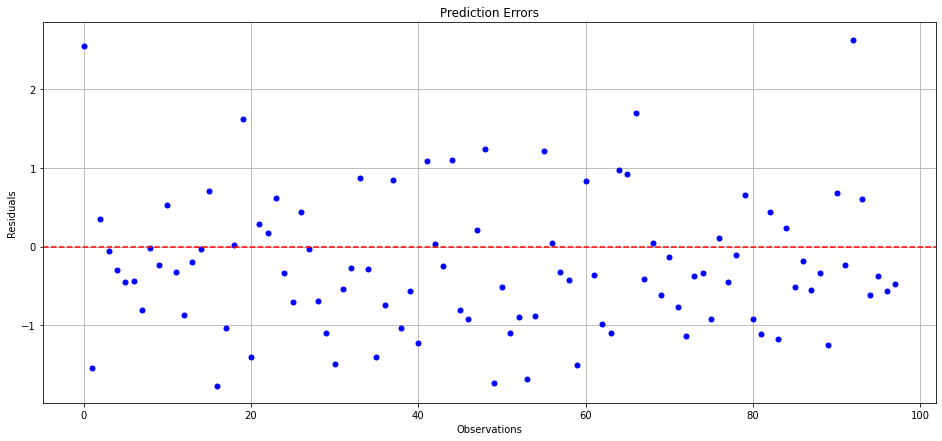

In [153]:
errors = y_test - predictions_II

plt.figure(figsize=(16, 7))
plt.plot(np.arange(len(errors)), errors, marker='o', linestyle='', color='blue', markersize=5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Prediction Errors')
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

<br>

## Decision Tree

In [155]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn import tree

In [156]:
X = data_matrix.iloc[:, 2:]
X = X.astype(float)

In [157]:
y = data_matrix['Yrs']

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
model_DT = DecisionTreeClassifier().fit(X_train, y_train)

In [160]:
predictions_DT = model_DT.predict(X_test)

In [161]:
r2_score(y_test, predictions_DT)

0.8981700456240029

In [162]:
mean_squared_error(y_test, predictions_DT)

2.188073394495413

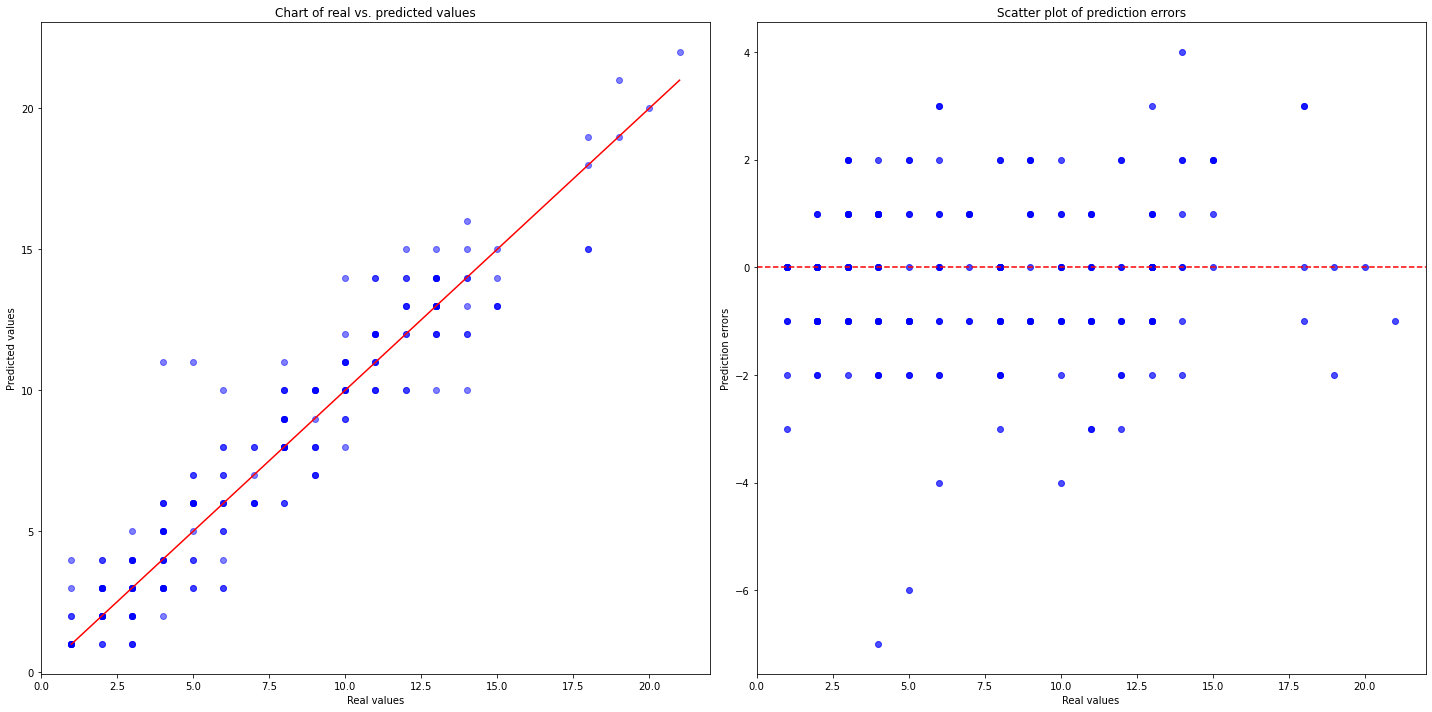

In [163]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

axes[0].scatter(y_test, predictions_DT, color='blue', alpha=0.5)
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
axes[0].set_title('Chart of real vs. predicted values')
axes[0].set_xlabel('Real values')
axes[0].set_ylabel('Predicted values')

errors = y_test - predictions_DT
axes[1].scatter(y_test, errors, color='blue', alpha=0.7)
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_title('Scatter plot of prediction errors')
axes[1].set_xlabel('Real values')
axes[1].set_ylabel('Prediction errors')

plt.tight_layout()
plt.show()

<br>

In [164]:
X_DT = data_matrix[['G', 'TOTMP', 'PPG', 'Height']]

In [165]:
model_DT2 = DecisionTreeClassifier().fit(X_DT, y)

In [166]:
predictions_DT2 = model_DT2.predict(test_df[['G', 'TOTMP', 'PPG', 'Height']])

In [167]:
r2_score(test_df['Yrs'], predictions_DT2)

0.9398533397098677

In [168]:
mean_squared_error(test_df['Yrs'], predictions_DT2)

1.5714285714285714

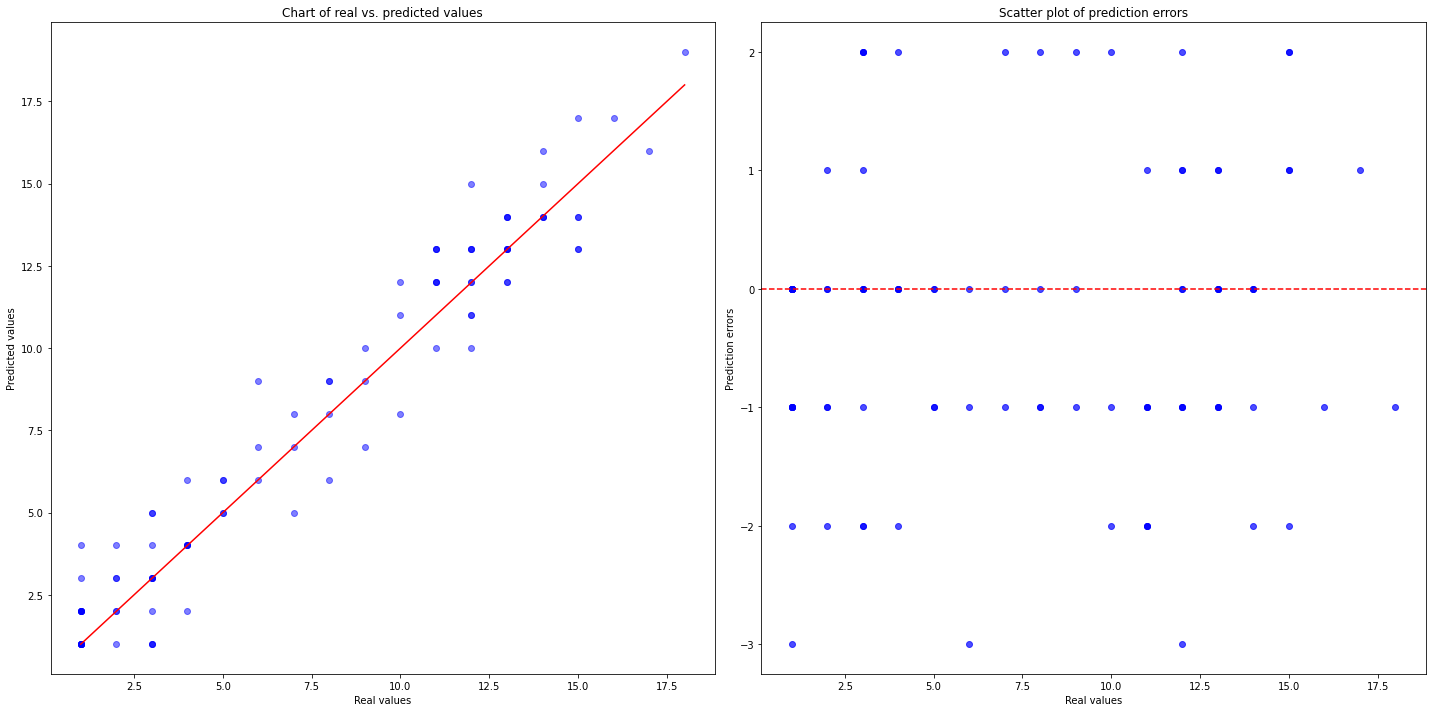

In [169]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

axes[0].scatter(test_df['Yrs'], predictions_DT2, color='blue', alpha=0.5)
axes[0].plot([min(test_df['Yrs']), max(test_df['Yrs'])], [min(test_df['Yrs']), max(test_df['Yrs'])], color='red')
axes[0].set_title('Chart of real vs. predicted values')
axes[0].set_xlabel('Real values')
axes[0].set_ylabel('Predicted values')

errors = test_df['Yrs'] - predictions_DT2
axes[1].scatter(test_df['Yrs'], errors, color='blue', alpha=0.7)
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_title('Scatter plot of prediction errors')
axes[1].set_xlabel('Real values')
axes[1].set_ylabel('Prediction errors')

plt.tight_layout()
plt.show()

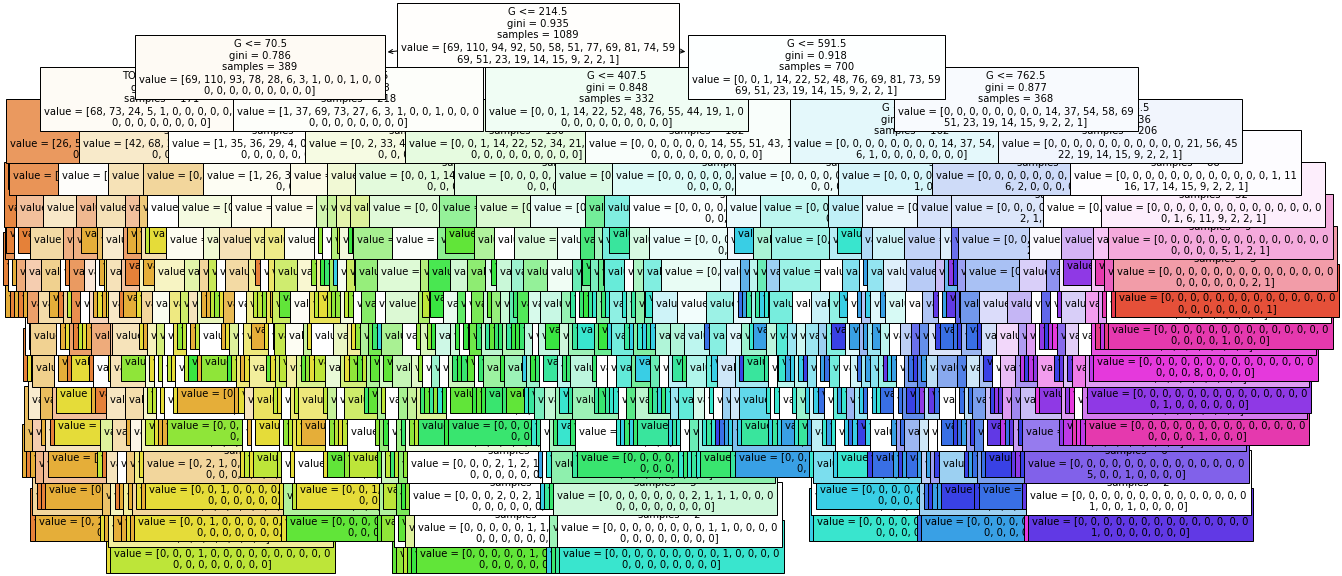

In [170]:
plt.figure(figsize=(20,10))
plot_tree(model_DT2, feature_names=X_DT.columns, filled=True, fontsize=10)
plt.show()

<br>

## Random forest

In [171]:
from sklearn.ensemble import RandomForestClassifier

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
model_RF = RandomForestClassifier(n_estimators=300, random_state=42).fit(X_train, y_train)

In [174]:
predictions_RF = model_RF.predict(X_test)

In [175]:
r2_score(y_test, predictions_RF)

0.9376638434427859

In [176]:
mean_squared_error(y_test, predictions_RF)

1.3394495412844036

In [177]:
accuracy_score(y_test, predictions_RF)

0.3623853211009174

<br>

In [178]:
n_estimators_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
mse_scores = []

for n_estimators in n_estimators_list:
    model_RF = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model_RF.fit(X_train, y_train)
    predictions_RF = model_RF.predict(X_test)
    mse = mean_squared_error(y_test, predictions_RF)
    mse_scores.append(mse)

In [179]:
best_index = mse_scores.index(min(mse_scores))
best_n_estimators = n_estimators_list[best_index]

print("Best number of estimators:", best_n_estimators)

Best number of estimators: 300


In [180]:
mse_scores

[1.4311926605504588,
 1.426605504587156,
 1.3394495412844036,
 1.4174311926605505,
 1.3577981651376148,
 1.408256880733945,
 1.4174311926605505,
 1.4036697247706422,
 1.426605504587156,
 1.3669724770642202]

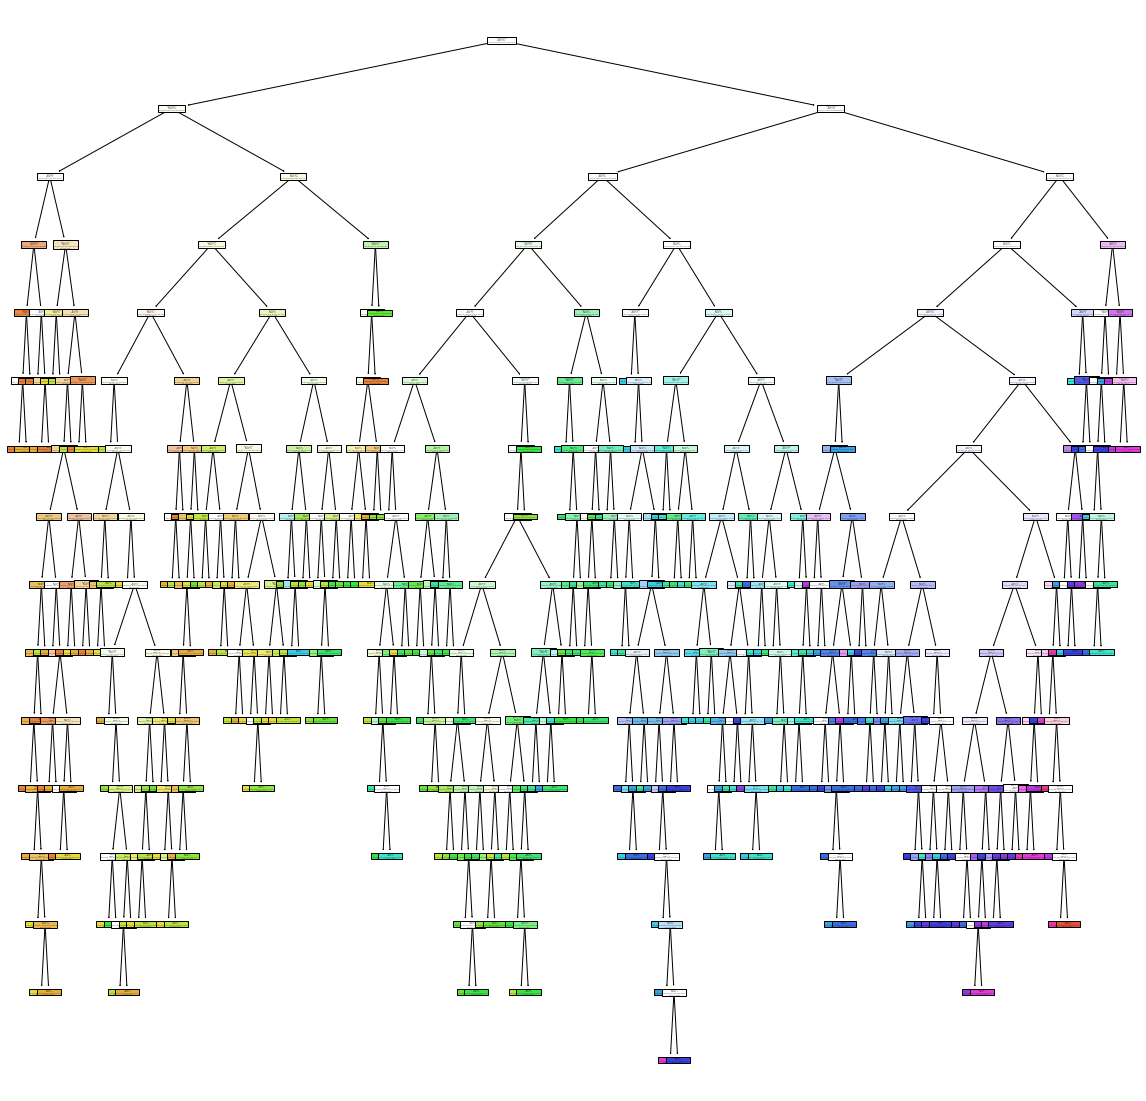

In [181]:
plt.figure(figsize=(20,20))
tree.plot_tree(model_RF.estimators_[0], filled=True, feature_names=X.columns)
plt.show()

<br>

### Analysis of the importance of features

In [182]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [183]:
model_RF.feature_importances_

array([0.04562049, 0.1563542 , 0.09107563, 0.06933372, 0.07292744,
       0.05273385, 0.04596367, 0.04298132, 0.04795107, 0.04773226,
       0.0402986 , 0.0450779 , 0.05307986, 0.04670218, 0.03870075,
       0.03706338, 0.02961239, 0.03679132])

In [184]:
model_RF_reduced = SelectFromModel(model_RF, threshold=0.045).fit(X_train, y_train)
X_selected = model_RF_reduced.transform(X_train)
X_test_selected = model_RF_reduced.transform(X_test)

In [185]:
X_train.columns[model_RF.feature_importances_ > 0.045]

Index(['Pk', 'G', 'TOTMP', 'TOTPTS', 'TOTTRB', 'TOTAST', 'FG%', 'FT%', 'WS/48',
       'VORP', 'MPG', 'PPG'],
      dtype='object')

In [186]:
model_RF_reduced = RandomForestRegressor(n_estimators=n_estimators, random_state=42).fit(X_selected, y_train)

In [187]:
predictions_FR_reduced = model_RF_reduced.predict(X_test_selected)

In [188]:
mean_squared_error(y_test, predictions_FR_reduced)

1.012830633027523

In [189]:
r2_score(y_test, predictions_FR_reduced)

0.9528642423918376

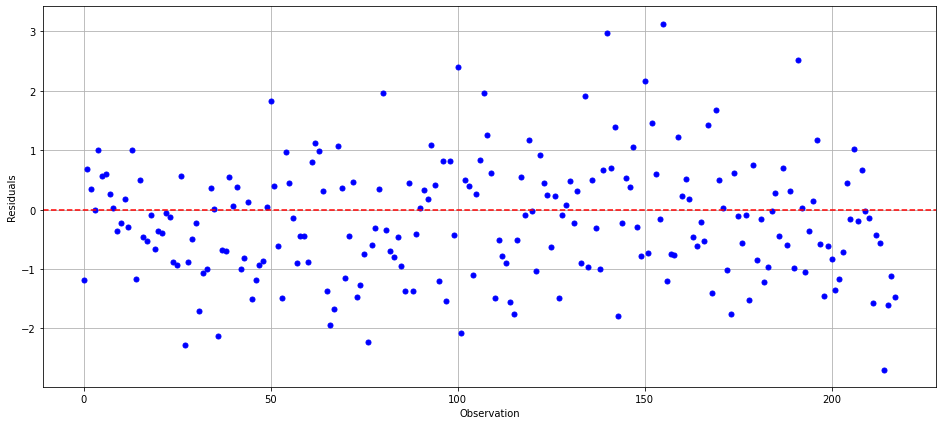

In [190]:
plt.figure(figsize=(16, 7))
plt.plot(np.arange(len(y_test-predictions_FR_reduced)), y_test-predictions_FR_reduced, marker='o', linestyle='', color='blue', markersize=5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

<br>

## K-nearest neighbour method

In [191]:
from sklearn.neighbors import KNeighborsRegressor

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [193]:
knn_model = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

In [194]:
mean_squared_error(y_train, knn_model.predict(X_train))

1.317132287281541

In [195]:
predictions_KNN = knn_model.predict(X_test)

In [196]:
mean_squared_error(y_test, predictions_KNN)

2.9138634046890926

In [197]:
r2_score(y_test, predictions_KNN)

0.8643927674895004

A relatively large difference can be observed between the MSE on the training data and the MSE on the test data. This means that the model suffers from over-fitting on the learning data: it does not generalise well.

<br>

### Improving kNN performance

In [198]:
from sklearn.model_selection import GridSearchCV

In [199]:
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [200]:
gridsearch.best_params_

{'n_neighbors': 12}

In [201]:
mean_squared_error(y_train, gridsearch.predict(X_train))

1.9802908534251817

In [202]:
predictions_KNN_grid = gridsearch.predict(X_test)

In [203]:
mean_squared_error(y_test, predictions_KNN_grid)

2.2810907237512743

In [204]:
r2_score(y_test, predictions_KNN_grid)

0.8938411458630854

<br>

In [205]:
from sklearn.ensemble import BaggingRegressor

In [206]:
bagging_model = BaggingRegressor(KNeighborsRegressor(n_neighbors=12), n_estimators=100).fit(X_train, y_train)

In [207]:
predictions_KNN_bagging = bagging_model.predict(X_test)

In [208]:
mean_squared_error(y_train, bagging_model.predict(X_train))

1.9548317068503636

In [209]:
mean_squared_error(y_test, predictions_KNN_bagging)

2.24249511340469

In [210]:
r2_score(y_test, predictions_KNN_bagging)

0.8956373329793831

Text(0.5, 1.0, 'Comparison of MSE values for different models')

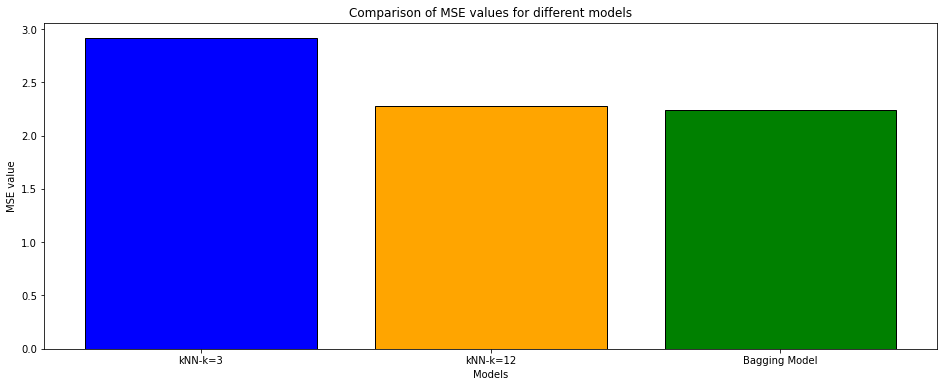

In [211]:
modele_kNN = ['kNN-k=3', 'kNN-k=12', 'Bagging Model']
mse_kNN = [mean_squared_error(y_test, predictions_KNN),
                mean_squared_error(y_test, predictions_KNN_grid),
                mean_squared_error(y_test, predictions_KNN_bagging)]

plt.figure(figsize=(16, 6))
plt.bar(modele_kNN, mse_kNN, color=['blue', 'orange', 'green'], edgecolor='black')

plt.xlabel('Models')
plt.ylabel('MSE value')
plt.title('Comparison of MSE values for different models')

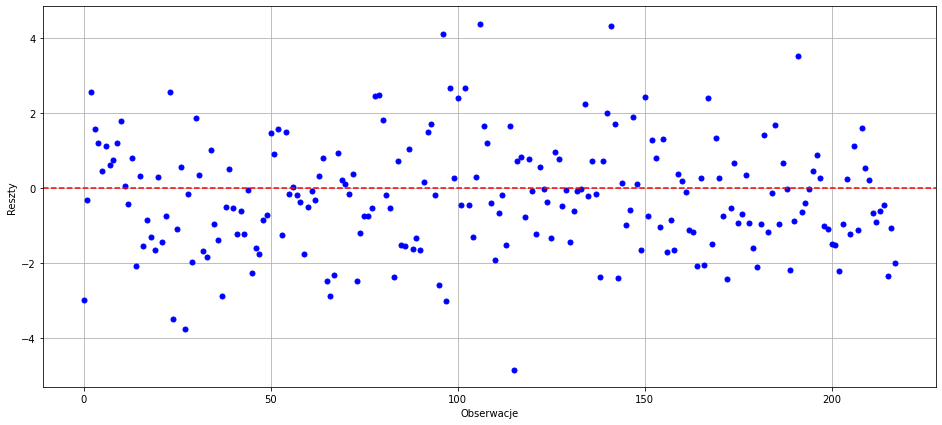

In [212]:
plt.figure(figsize=(16, 7))
plt.plot(np.arange(len(y_test-predictions_KNN_bagging)), y_test-predictions_KNN_bagging, marker='o', linestyle='', color='blue', markersize=5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Obserwacje')
plt.ylabel('Reszty')
plt.grid(True)
plt.show()

<br>

In [213]:
bagging_model_reduced = BaggingRegressor(KNeighborsRegressor(n_neighbors=12), n_estimators=100).fit(X_selected, y_train)

In [214]:
predictions_bagging_model_reduced = bagging_model_reduced.predict(X_test_selected)

In [215]:
mean_squared_error(y_test, predictions_bagging_model_reduced)

2.2833443393221207

In [216]:
r2_score(y_test, predictions_bagging_model_reduced)

0.8937362656651278

<br>

## Summary

The use of statistical methods and models to study the impact of career statistics on the length of NBA players' careers was crucial in better understanding the phenomenon addressed in the bachelor's thesis. While linear regression modeling was just one of several possible approaches, it provided a solid foundation for explaining the number of seasons spent in the NBA based on career statistics. However, the analysis did not solely aim to explain the number of seasons played but also yielded valuable insights into the significance of individual variables and their interrelationships. The estimated linear regression model was rigorously tested and subsequently verified for accuracy and reliability. The analysis results indicate that despite some imperfections related to the lack of normality in the random component, the final model satisfactorily explains the phenomenon under study. It is worth noting that the model development process primarily focused on analyzing career statistics of NBA players. Factors such as injuries or contract details may also influence career length but were not included in the analysis, which primarily centered on career statistics.